In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # for visualization
import seaborn as sns               # for visualization
%matplotlib inline

import re
import warnings
from scipy.stats import boxcox, shapiro
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import randint, uniform
from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Initialize label encoder (in case you need it outside preprocessing)
label_encoder = preprocessing.LabelEncoder()

# Ignore warnings
warnings.filterwarnings('ignore')


import warnings


In [5]:
dataTrain=pd.read_csv("train_dataset.csv") #data
dataTest=pd.read_csv("test_dataset.csv") #data2


# Data overview


**Column Descriptions:**

Gender – Male or Female.  
Age – The person’s age in years.  
Height – Height in meters.  
Weight – Weight in kilograms.  
family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).  
FAVC – If the person frequently consumes high-calorie foods (yes/no).  
FCVC – Frequency of vegetable consumption (scale from 1 to 3).  
NCP – Number of main meals per day.  
CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).  
SMOKE – Whether the person smokes (yes/no).  
CH2O – Daily water intake (scale from 1 to 3).  
SCC – If the person monitors their calorie intake (yes/no).  
FAF – Physical activity frequency (scale from 0 to 3).  
TUE – Time spent using technology (scale from 0 to 3).  
CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).  
MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).  
NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).  

This dataset provides a structured view of how different lifestyle factors relate to obesity levels, making it useful for healthcare analysis and decision-making.

In [6]:
dataTrain.shape

(1900, 17)

In [7]:
dataTrain.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1900.000000,1900.000000,1900.000000,1888.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,24.284211,1.701416,86.515363,2.417272,2.682968,2.015832,1.004505,0.663579
std,6.287165,0.093077,26.157025,0.536367,0.780401,0.611293,0.853269,0.608729
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.812500,2.000000,2.660000,1.610000,0.110000,0.000000
50%,23.000000,1.700000,83.000000,2.380000,3.000000,2.000000,1.000000,0.631000
75%,26.000000,1.770000,107.050000,3.000000,3.000000,2.490000,1.660000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1900 non-null   object 
 1   Age                             1900 non-null   int64  
 2   Height                          1900 non-null   float64
 3   Weight                          1900 non-null   float64
 4   family_history_with_overweight  1900 non-null   object 
 5   FAVC                            1900 non-null   object 
 6   FCVC                            1888 non-null   float64
 7   NCP                             1900 non-null   float64
 8   CAEC                            1900 non-null   object 
 9   SMOKE                           1900 non-null   object 
 10  CH2O                            1900 non-null   float64
 11  SCC                             1900 non-null   object 
 12  FAF                             19

In [9]:
dataTrain.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,18,1.82,142.10,yes,yes,3.00,3.00,Sometimes,no,2.71,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III
1,Male,32,1.84,98.26,yes,yes,2.33,1.82,Sometimes,no,2.56,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II
2,Male,24,1.76,117.33,yes,yes,1.54,3.00,Sometimes,no,2.00,no,1.63,0.631,NaN,Public_Transportation,Obesity_Type_II
3,Female,26,1.62,110.68,yes,yes,3.00,3.00,Sometimes,no,2.69,no,0.00,0.425,NaN,Public_Transportation,Obesity_Type_III
4,Male,32,1.78,121.20,yes,yes,2.76,3.00,Sometimes,no,2.16,no,0.43,0.716,NaN,Automobile,Obesity_Type_II
5,Male,33,1.85,85.00,no,yes,NaN,3.00,Frequently,no,2.00,no,1.00,0.000,NaN,Automobile,Normal_Weight
6,Female,32,1.67,90.00,yes,yes,NaN,1.00,Sometimes,no,2.00,no,2.00,0.000,NaN,Automobile,Obesity_Type_I
7,Female,27,1.55,62.88,no,yes,NaN,1.70,Sometimes,no,1.00,no,0.79,0.395,NaN,Public_Transportation,Overweight_Level_I
8,Female,19,1.68,127.43,yes,yes,NaN,3.00,Sometimes,no,1.44,no,1.43,0.662,NaN,Public_Transportation,Obesity_Type_III
9,Female,26,1.61,107.01,yes,yes,3.00,3.00,Sometimes,no,2.68,no,0.00,0.509,NaN,Public_Transportation,Obesity_Type_III


In [10]:
dataTrain.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

# Data preprocessing

# Checking for nulls

In [11]:
dataTrain.isnull()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
dataTrain.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              12
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                              28
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [13]:
null=dataTrain.isna().sum()
print("nulls in favc are about:",np.round(null[6]/99*100),"%")
print("nulls in calc  are about:",np.round(null[14]/99*100),"%")

nulls in favc are about: 12.0 %
nulls in calc  are about: 28.0 %


In [14]:
dataTrain['CALC'] = dataTrain['CALC'].fillna(dataTrain['CALC'].mode()[0])

<Axes: xlabel='FCVC', ylabel='Density'>

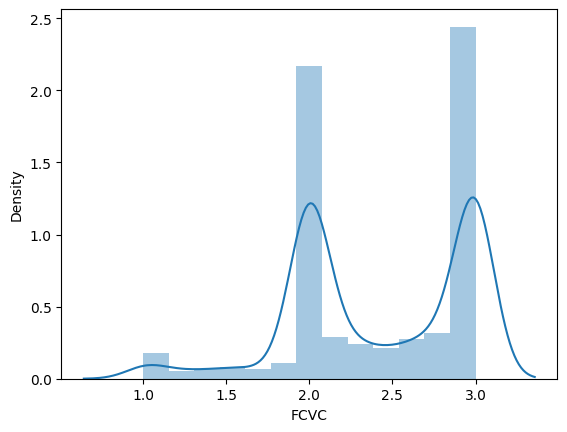

In [15]:
sns.distplot(dataTrain['FCVC'])

<Axes: ylabel='Density'>

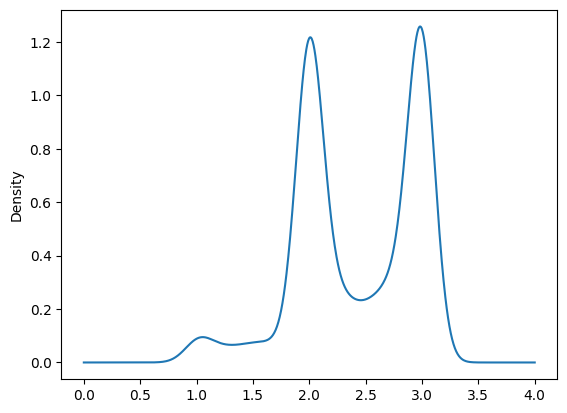

In [16]:
dataTrain['FCVC'].plot(kind='kde')

In [17]:
dataTrain['FCVC'].fillna(dataTrain['FCVC'].mean(), inplace=True)

In [18]:
dataTrain.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [19]:
dataTrain.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,18,1.82,142.10,yes,yes,3.00,3.00,Sometimes,no,2.71,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III
1,Male,32,1.84,98.26,yes,yes,2.33,1.82,Sometimes,no,2.56,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II
2,Male,24,1.76,117.33,yes,yes,1.54,3.00,Sometimes,no,2.00,no,1.63,0.631,Sometimes,Public_Transportation,Obesity_Type_II
3,Female,26,1.62,110.68,yes,yes,3.00,3.00,Sometimes,no,2.69,no,0.00,0.425,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,32,1.78,121.20,yes,yes,2.76,3.00,Sometimes,no,2.16,no,0.43,0.716,Sometimes,Automobile,Obesity_Type_II


# Checking for duplicates

In [20]:
dataTrain.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1895    False
1896    False
1897    False
1898    False
1899    False
Length: 1900, dtype: bool

In [21]:
dataTrain.duplicated().sum()

np.int64(22)

In [22]:
print(f"Total duplicates: {dataTrain.duplicated().sum()}")

Total duplicates: 22


In [23]:
dataTrain.drop_duplicates(inplace=True)
dataTrain.duplicated().sum()

np.int64(0)

In [24]:
dataTrain.shape

(1878, 17)

# Checking for wrong Format and Unique values



In [25]:
dataTrain['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
dataTrain['Age'].unique()

array([18, 32, 24, 26, 33, 27, 19, 20, 37, 31, 22, 23, 29, 21, 30, 17, 16,
       28, 40, 25, 34, 14, 42, 35, 38, 52, 36, 41, 44, 45, 39, 55, 46, 43,
       15, 61, 51, 48, 47])

In [27]:
dataTrain['Weight'].unique()

array([142.1 ,  98.26, 117.33, ...,  99.96, 118.42,  94.79], shape=(1214,))

In [28]:
dataTrain['Height'].unique()

array([1.82, 1.84, 1.76, 1.62, 1.78, 1.85, 1.67, 1.55, 1.68, 1.61, 1.72,
       1.6 , 1.51, 1.71, 1.63, 1.64, 1.57, 1.81, 1.7 , 1.8 , 1.65, 1.74,
       1.73, 1.75, 1.59, 1.87, 1.5 , 1.88, 1.77, 1.79, 1.92, 1.52, 1.91,
       1.83, 1.56, 1.69, 1.86, 1.66, 1.89, 1.58, 1.53, 1.49, 1.54, 1.9 ,
       1.46, 1.93, 1.98, 1.95, 1.48, 1.94, 1.45])

In [29]:
dataTrain['FAVC'].unique()

array(['yes', 'no'], dtype=object)

In [30]:
dataTrain['FCVC'].unique()

array([3.        , 2.33      , 1.54      , 2.76      , 2.41727225,
       2.        , 2.05      , 2.94      , 2.71      , 2.32      ,
       2.97      , 1.76      , 1.9       , 2.31      , 2.77      ,
       2.68      , 2.42      , 1.        , 2.69      , 2.89      ,
       2.26      , 2.45      , 2.58      , 2.93      , 2.85      ,
       2.59      , 2.28      , 2.91      , 2.4       , 2.74      ,
       2.84      , 1.91      , 2.21      , 2.92      , 2.88      ,
       2.6       , 2.43      , 1.94      , 2.9       , 1.95      ,
       2.34      , 2.56      , 2.64      , 2.49      , 1.43      ,
       2.87      , 2.19      , 2.07      , 2.63      , 2.66      ,
       2.06      , 2.98      , 1.84      , 2.13      , 1.81      ,
       1.48      , 2.22      , 2.57      , 1.41      , 1.39      ,
       2.7       , 2.73      , 2.61      , 2.2       , 1.12      ,
       2.12      , 1.2       , 2.18      , 1.21      , 1.01      ,
       2.04      , 2.8       , 2.44      , 2.16      , 1.57   

In [31]:
dataTrain['NCP'] = dataTrain['NCP'].round()
dataTrain['NCP'].unique()

array([3., 2., 1., 4.])

In [32]:
dataTrain['CAEC'].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [33]:
dataTrain['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
dataTrain['CH2O'].unique()

array([2.71, 2.56, 2.  , 2.69, 2.16, 1.  , 1.44, 2.68, 1.15, 1.25, 3.  ,
       2.62, 2.63, 2.86, 1.05, 2.35, 2.93, 1.82, 2.21, 2.85, 2.55, 1.97,
       1.06, 2.31, 2.06, 1.17, 2.15, 2.76, 1.95, 1.02, 2.61, 2.57, 1.03,
       1.38, 1.61, 2.79, 2.88, 1.8 , 2.3 , 1.96, 1.6 , 1.98, 1.09, 2.94,
       1.48, 2.37, 1.71, 1.16, 1.57, 2.78, 2.04, 2.91, 2.46, 2.6 , 1.33,
       1.91, 2.97, 2.96, 2.25, 2.44, 2.9 , 1.87, 1.63, 2.98, 2.74, 2.41,
       1.85, 1.81, 2.1 , 2.09, 1.76, 2.43, 2.03, 1.31, 2.65, 1.21, 1.18,
       2.38, 1.77, 1.93, 1.29, 2.45, 2.01, 2.53, 1.27, 1.04, 2.23, 2.02,
       1.32, 2.64, 2.18, 1.41, 1.07, 1.62, 1.2 , 2.22, 1.84, 2.47, 2.39,
       2.82, 2.83, 1.53, 1.49, 2.17, 1.3 , 1.34, 2.5 , 2.84, 1.35, 2.77,
       1.99, 2.36, 1.13, 2.7 , 2.12, 2.58, 1.37, 1.23, 2.28, 2.95, 2.89,
       1.66, 2.08, 1.22, 1.79, 2.29, 2.32, 1.28, 2.54, 2.48, 2.14, 1.52,
       2.99, 1.86, 1.89, 1.55, 2.24, 1.64, 1.65, 1.1 , 2.87, 1.4 , 1.56,
       2.11, 1.83, 2.19, 2.75, 1.47, 1.74, 1.5 , 1.

In [35]:
print(sorted(dataTrain['CH2O'].unique()))

[np.float64(1.0), np.float64(1.01), np.float64(1.02), np.float64(1.03), np.float64(1.04), np.float64(1.05), np.float64(1.06), np.float64(1.07), np.float64(1.08), np.float64(1.09), np.float64(1.1), np.float64(1.11), np.float64(1.12), np.float64(1.13), np.float64(1.14), np.float64(1.15), np.float64(1.16), np.float64(1.17), np.float64(1.18), np.float64(1.19), np.float64(1.2), np.float64(1.21), np.float64(1.22), np.float64(1.23), np.float64(1.24), np.float64(1.25), np.float64(1.26), np.float64(1.27), np.float64(1.28), np.float64(1.29), np.float64(1.3), np.float64(1.31), np.float64(1.32), np.float64(1.33), np.float64(1.34), np.float64(1.35), np.float64(1.36), np.float64(1.37), np.float64(1.38), np.float64(1.39), np.float64(1.4), np.float64(1.41), np.float64(1.42), np.float64(1.43), np.float64(1.44), np.float64(1.45), np.float64(1.46), np.float64(1.47), np.float64(1.48), np.float64(1.49), np.float64(1.5), np.float64(1.51), np.float64(1.52), np.float64(1.53), np.float64(1.54), np.float64(1.55

In [36]:
dataTrain['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [37]:
dataTrain['FAF'].unique()

array([2.  , 1.33, 1.63, 0.  , 0.43, 1.  , 0.79, 1.43, 0.88, 0.15, 1.18,
       1.1 , 1.81, 1.09, 0.98, 1.05, 0.99, 0.45, 1.58, 1.08, 0.01, 1.52,
       1.68, 1.44, 3.  , 1.5 , 0.6 , 1.62, 1.32, 0.59, 0.07, 0.69, 0.27,
       1.93, 1.03, 0.48, 0.63, 0.11, 0.02, 1.11, 1.31, 0.94, 0.18, 0.28,
       0.83, 1.17, 0.78, 2.04, 0.36, 0.55, 1.48, 2.11, 0.73, 2.71, 0.57,
       0.64, 1.86, 1.46, 1.24, 0.97, 1.25, 0.95, 0.09, 2.64, 2.54, 1.47,
       1.06, 0.04, 2.01, 0.17, 1.97, 1.92, 1.77, 0.25, 1.75, 0.26, 0.62,
       0.53, 0.92, 0.32, 0.23, 0.52, 1.22, 1.88, 0.68, 2.88, 0.14, 1.02,
       0.93, 1.59, 1.16, 1.6 , 0.87, 1.45, 1.07, 1.51, 0.03, 0.22, 1.49,
       2.94, 0.19, 1.64, 1.21, 1.38, 1.94, 1.42, 2.08, 0.5 , 0.61, 1.98,
       2.24, 1.7 , 0.35, 1.96, 2.61, 1.19, 1.9 , 1.4 , 2.05, 1.41, 1.67,
       1.66, 2.46, 0.12, 0.89, 1.8 , 0.7 , 1.85, 0.77, 1.26, 0.2 , 0.08,
       1.72, 0.13, 1.35, 0.21, 1.95, 1.27, 1.54, 0.65, 0.42, 1.28, 1.36,
       0.9 , 0.51, 0.05, 1.61, 0.58, 0.29, 1.15, 0.

In [38]:
print(sorted(dataTrain['FAF'].unique()))

[np.float64(0.0), np.float64(0.01), np.float64(0.02), np.float64(0.03), np.float64(0.04), np.float64(0.05), np.float64(0.06), np.float64(0.07), np.float64(0.08), np.float64(0.09), np.float64(0.1), np.float64(0.11), np.float64(0.12), np.float64(0.13), np.float64(0.14), np.float64(0.15), np.float64(0.16), np.float64(0.17), np.float64(0.18), np.float64(0.19), np.float64(0.2), np.float64(0.21), np.float64(0.22), np.float64(0.23), np.float64(0.24), np.float64(0.25), np.float64(0.26), np.float64(0.27), np.float64(0.28), np.float64(0.29), np.float64(0.3), np.float64(0.31), np.float64(0.32), np.float64(0.33), np.float64(0.34), np.float64(0.35), np.float64(0.36), np.float64(0.37), np.float64(0.38), np.float64(0.39), np.float64(0.4), np.float64(0.41), np.float64(0.42), np.float64(0.43), np.float64(0.44), np.float64(0.45), np.float64(0.46), np.float64(0.47), np.float64(0.48), np.float64(0.49), np.float64(0.5), np.float64(0.51), np.float64(0.52), np.float64(0.53), np.float64(0.54), np.float64(0.55

In [39]:
dataTrain['TUE'].unique()

array([8.140e-01, 4.810e-01, 6.310e-01, 4.250e-01, 7.160e-01, 0.000e+00,
       3.950e-01, 6.620e-01, 5.090e-01, 2.000e+00, 2.260e-01, 7.780e-01,
       1.000e+00, 1.894e+00, 1.240e-01, 2.440e-01, 1.252e+00, 3.790e-01,
       6.800e-01, 7.200e-02, 1.355e+00, 6.860e-01, 1.900e-02, 3.080e-01,
       9.310e-01, 1.036e+00, 4.270e-01, 4.340e-01, 8.400e-02, 3.900e-02,
       7.060e-01, 1.620e-01, 7.140e-01, 1.579e+00, 1.280e-01, 9.000e-01,
       9.160e-01, 7.790e-01, 1.340e+00, 7.800e-02, 5.900e-01, 4.140e-01,
       1.332e+00, 1.366e+00, 4.290e-01, 8.870e-01, 1.120e-01, 5.050e-01,
       7.730e-01, 1.526e+00, 6.100e-02, 4.000e-03, 1.554e+00, 2.080e-01,
       3.110e-01, 4.540e-01, 1.431e+00, 1.488e+00, 1.680e-01, 1.350e+00,
       1.120e+00, 5.740e-01, 1.992e+00, 6.470e-01, 5.850e-01, 1.890e+00,
       1.290e-01, 1.507e+00, 9.220e-01, 3.310e-01, 4.350e-01, 1.000e-02,
       6.850e-01, 3.000e-03, 8.710e-01, 5.560e-01, 6.920e-01, 4.130e-01,
       3.690e-01, 5.010e-01, 6.750e-01, 1.360e+00, 

In [40]:
print(sorted(dataTrain['TUE'].unique()))


[np.float64(0.0), np.float64(0.001), np.float64(0.002), np.float64(0.003), np.float64(0.004), np.float64(0.005), np.float64(0.008), np.float64(0.009), np.float64(0.01), np.float64(0.011), np.float64(0.013), np.float64(0.015), np.float64(0.017), np.float64(0.019), np.float64(0.02), np.float64(0.022), np.float64(0.024), np.float64(0.027), np.float64(0.029), np.float64(0.035), np.float64(0.038), np.float64(0.039), np.float64(0.045), np.float64(0.047), np.float64(0.049), np.float64(0.051), np.float64(0.052), np.float64(0.053), np.float64(0.056), np.float64(0.058), np.float64(0.061), np.float64(0.062), np.float64(0.063), np.float64(0.065), np.float64(0.066), np.float64(0.067), np.float64(0.069), np.float64(0.071), np.float64(0.072), np.float64(0.076), np.float64(0.077), np.float64(0.078), np.float64(0.079), np.float64(0.08), np.float64(0.081), np.float64(0.082), np.float64(0.084), np.float64(0.087), np.float64(0.088), np.float64(0.089), np.float64(0.09), np.float64(0.092), np.float64(0.093)

In [41]:
dataTrain['CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [42]:
dataTrain['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Motorbike', 'Walking',
       'Bike'], dtype=object)

In [43]:
dataTrain['NObeyesdad'].unique()

array(['Obesity_Type_III', 'Overweight_Level_II', 'Obesity_Type_II',
       'Normal_Weight', 'Obesity_Type_I', 'Overweight_Level_I',
       'Insufficient_Weight'], dtype=object)

# feature engineering

his creates a new feature BMI (Body Mass Index) using the existing features Weight and Height. The BMI is a common metric used to assess body weight in relation to height and can be very informative when analyzing obesity-related data.

In [44]:
dataTrain['BMI'] = (dataTrain['Weight']/dataTrain['Height']**2)

In [45]:
dataTrain.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,18,1.82,142.10,yes,yes,3.00,3.0,Sometimes,no,2.71,no,2.00,0.814,Sometimes,Public_Transportation,Obesity_Type_III,42.899408
1,Male,32,1.84,98.26,yes,yes,2.33,2.0,Sometimes,no,2.56,no,1.33,0.481,Sometimes,Automobile,Overweight_Level_II,29.022921
2,Male,24,1.76,117.33,yes,yes,1.54,3.0,Sometimes,no,2.00,no,1.63,0.631,Sometimes,Public_Transportation,Obesity_Type_II,37.877712
3,Female,26,1.62,110.68,yes,yes,3.00,3.0,Sometimes,no,2.69,no,0.00,0.425,Sometimes,Public_Transportation,Obesity_Type_III,42.173449
4,Male,32,1.78,121.20,yes,yes,2.76,3.0,Sometimes,no,2.16,no,0.43,0.716,Sometimes,Automobile,Obesity_Type_II,38.252746


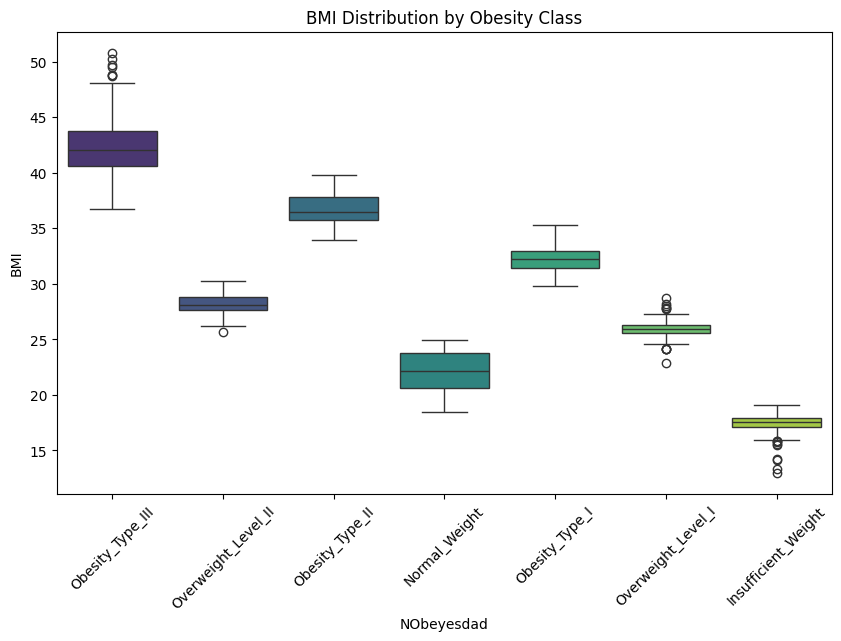

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=dataTrain, palette='viridis')
plt.title('BMI Distribution by Obesity Class')
plt.xticks(rotation=45)
plt.show()

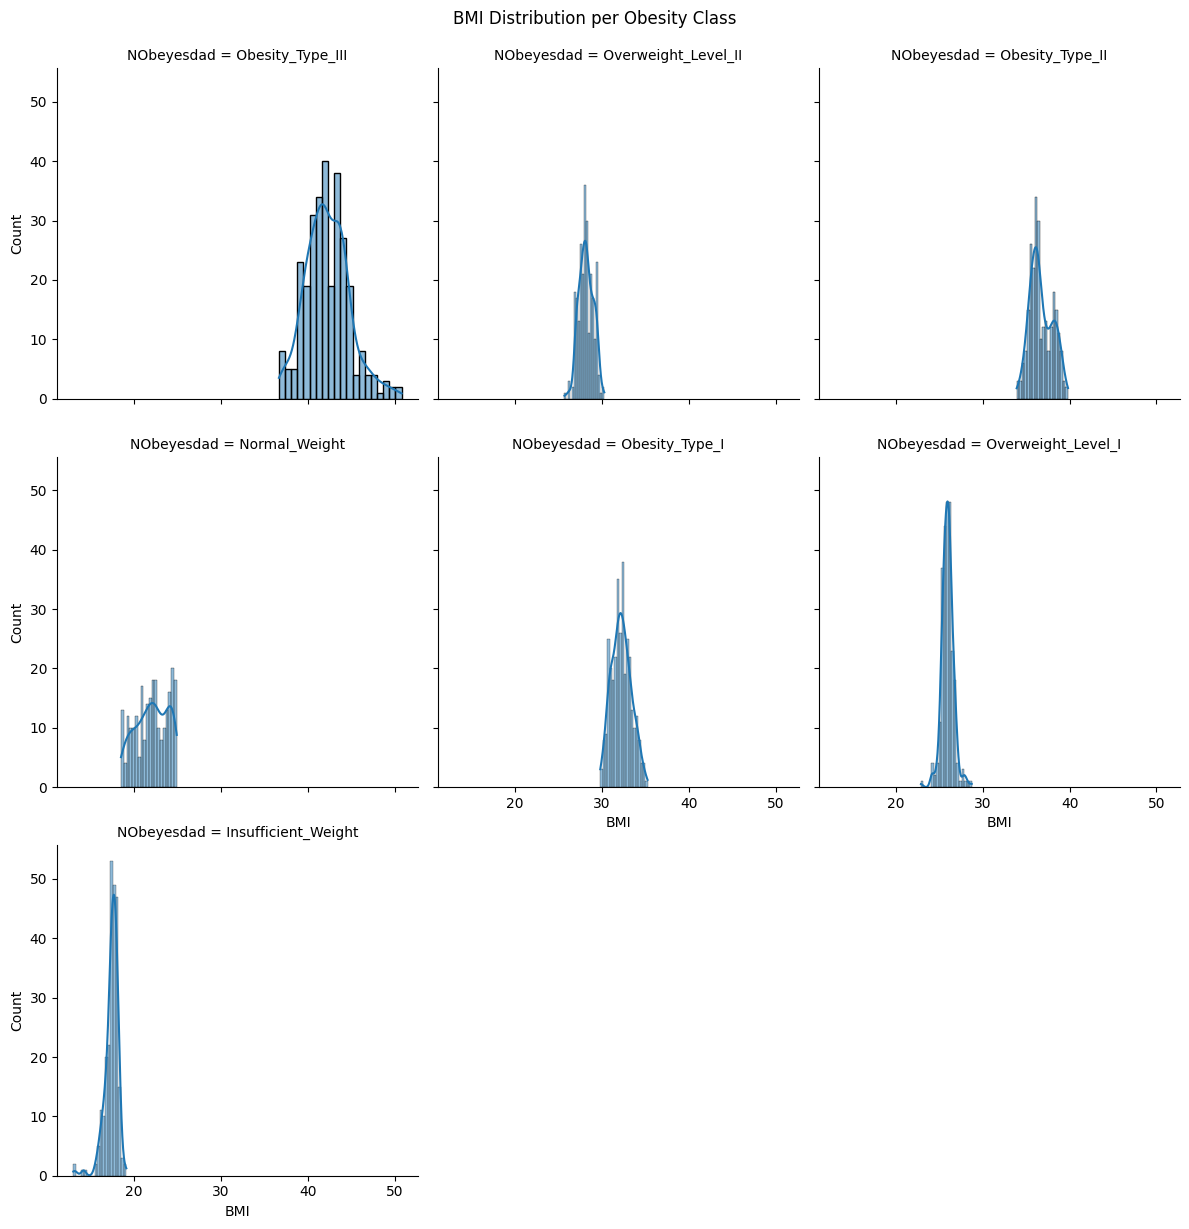

In [47]:
g = sns.FacetGrid(dataTrain, col='NObeyesdad', col_wrap=3, height=4)
g.map(sns.histplot, 'BMI', kde=True, bins=20)
g.fig.suptitle('BMI Distribution per Obesity Class', y=1.02)
plt.show()

# Data visualization

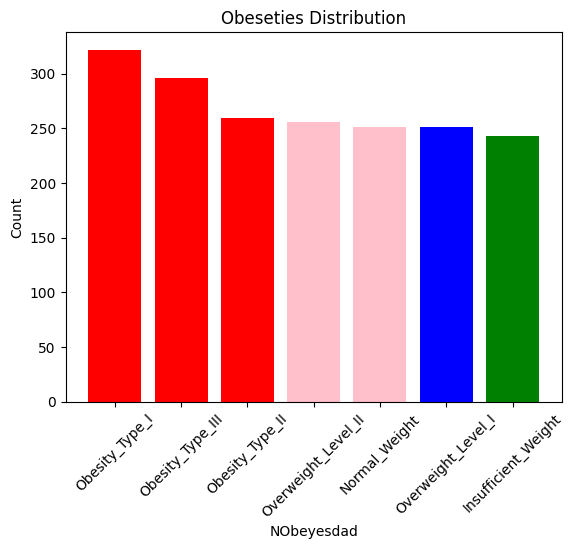

In [48]:
plt.figure()
colors = ["red", "red","red","pink", "pink","blue", "green"]
gender_counts = dataTrain["NObeyesdad"].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.xlabel("NObeyesdad")
plt.ylabel("Count")
plt.title("Obeseties Distribution")
plt.xticks(rotation=45)
plt.show()

This bar chart shows the count of each obesity category in the `NObeyesdad` column,and the chart helps visualize the class distribution of the target variable.

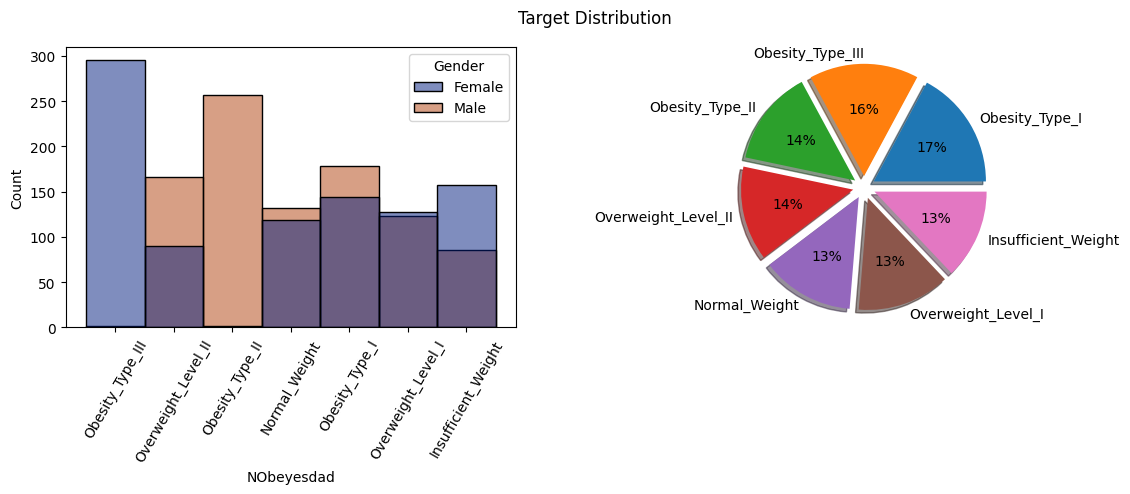

In [49]:
fig, axs = plt.subplots(1,2,figsize = (12,5))
plt.suptitle("Target Distribution")
#a histogram (bar plot for categorical data) of 'NObeyesdad' with bars grouped by 'Gender'
sns.histplot(binwidth=0.5,x=dataTrain['NObeyesdad'],data=dataTrain,hue='Gender',palette="dark",ax=axs[0],discrete=True)
axs[0].tick_params(axis='x', rotation=60)
#a pie chart showing percentage distribution of each category in 'NObeyesdad'
axs[1].pie(
        dataTrain['NObeyesdad'].value_counts(),
        shadow = True,
        explode=[.1 for i in range(dataTrain['NObeyesdad'].nunique())],
        labels = dataTrain['NObeyesdad'].value_counts().index,
        autopct='%1.f%%',
    )

plt.tight_layout()
plt.show()

This code creates a side-by-side visualization of the `NObeyesdad` (obesity level) distribution. The left subplot is a histogram showing the count of each obesity category, split by gender. The right subplot is a pie chart showing the overall percentage distribution of each category. Together, these plots help analyze class balance and gender-based differences in the target variable.

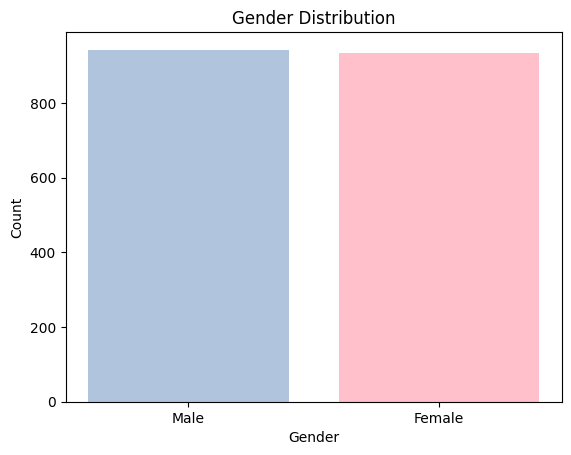

In [50]:
plt.figure()
colors = ["LightSteelBlue", "pink"]
gender_counts = dataTrain["Gender"].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

Text(0.5, 1.0, 'Calorie Consumption vs. Obesity Levels')

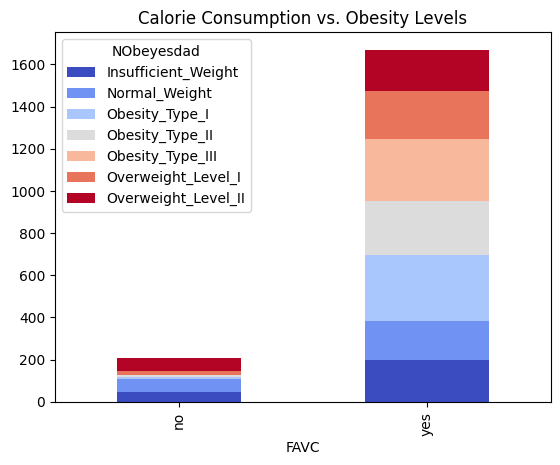

In [51]:
pd.crosstab(dataTrain['FAVC'], dataTrain['NObeyesdad']).plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Calorie Consumption vs. Obesity Levels')

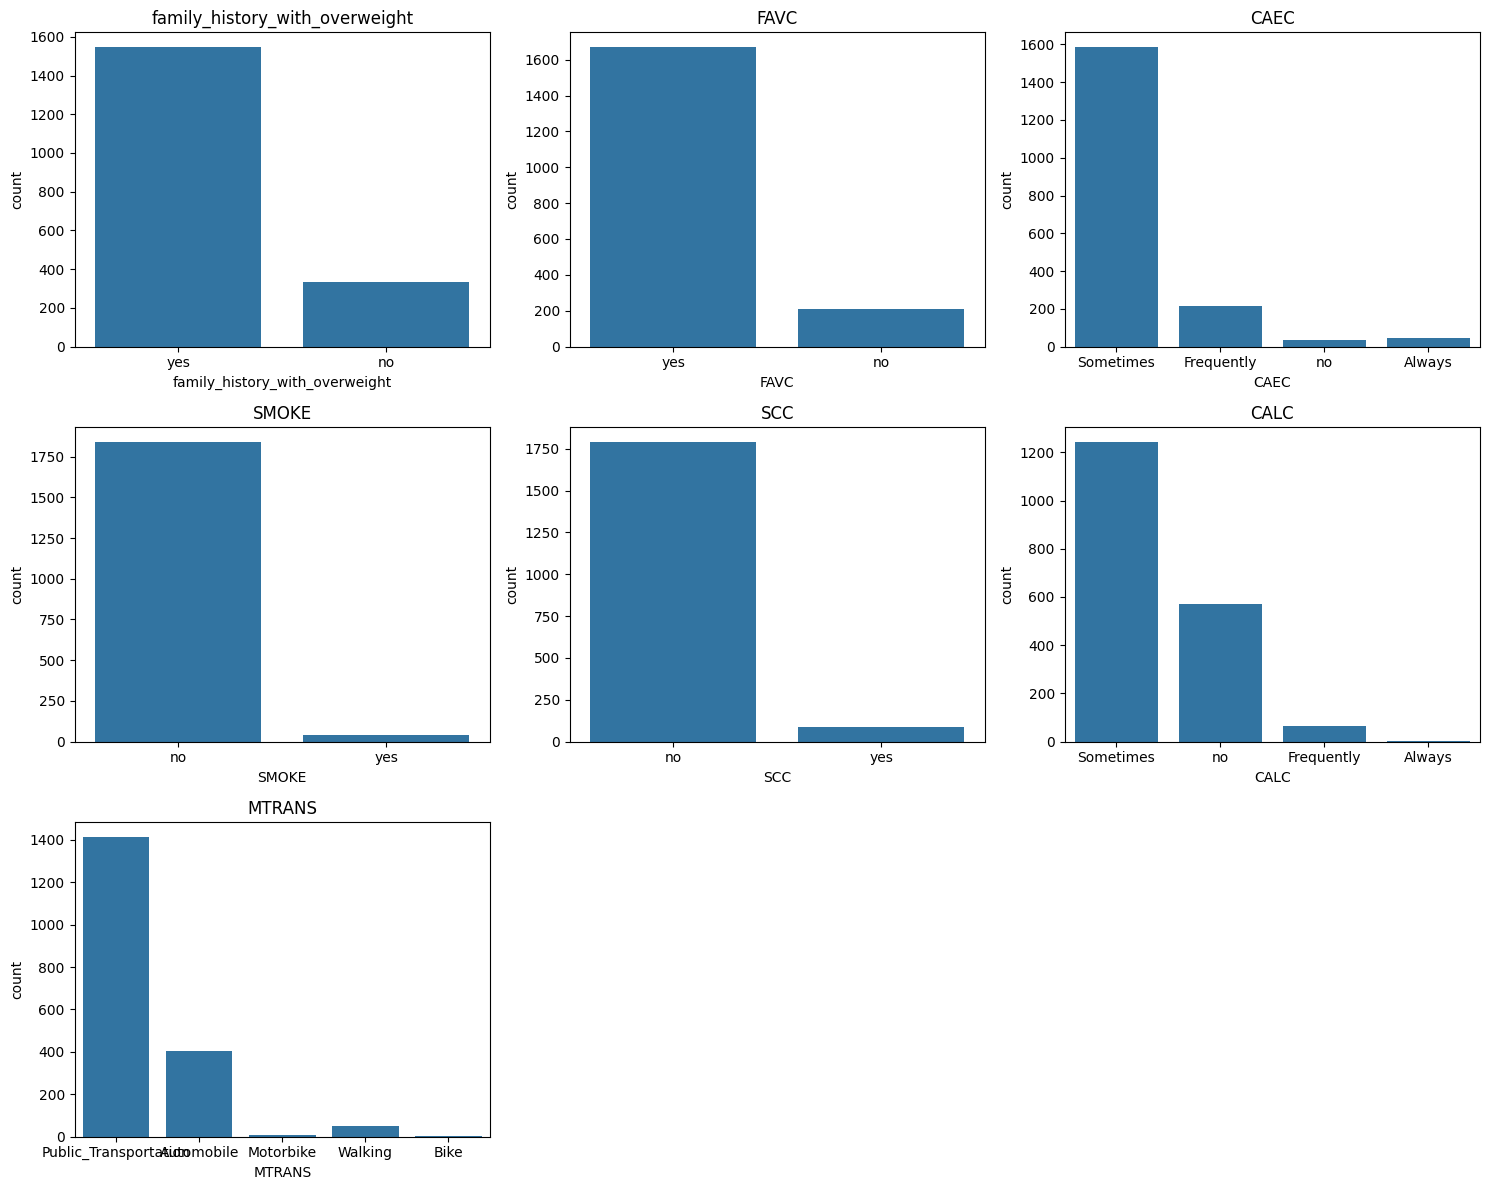

In [52]:
# Count plots for categorical variables
categorical_columns = ['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=dataTrain, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

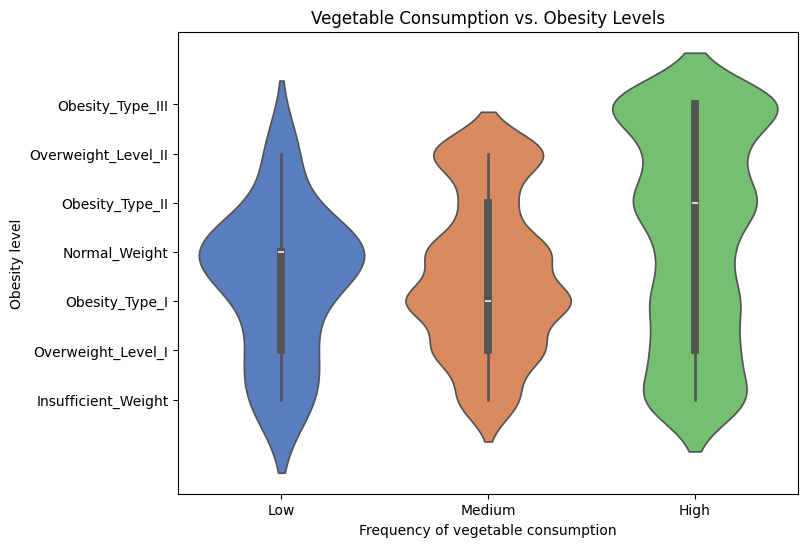

In [53]:
# Increase figure size
plt.figure(figsize=(8, 6))

# Convert FCVC to categorical to avoid too many values on x-axis
data2 = dataTrain.copy()
data2['FCVC_cat'] = pd.cut(dataTrain['FCVC'], bins=[0, 1, 2, 3], labels=['Low', 'Medium', 'High'])

# Create violinplot with the new categorical variable
sns.violinplot(x='FCVC_cat', y='NObeyesdad', data=data2, palette='muted')

# Improve visualization
plt.title('Vegetable Consumption vs. Obesity Levels')
plt.xlabel('Frequency of vegetable consumption')
plt.ylabel('Obesity level')
plt.show()

# Checking for outliers

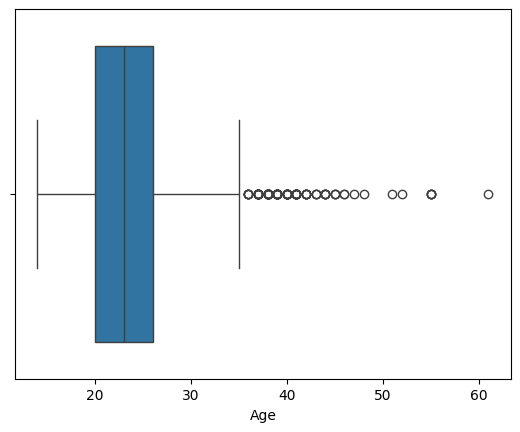

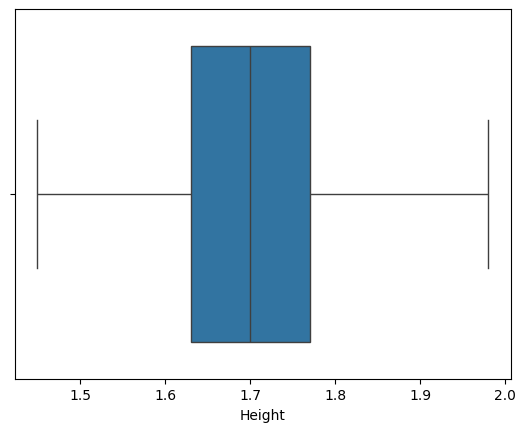

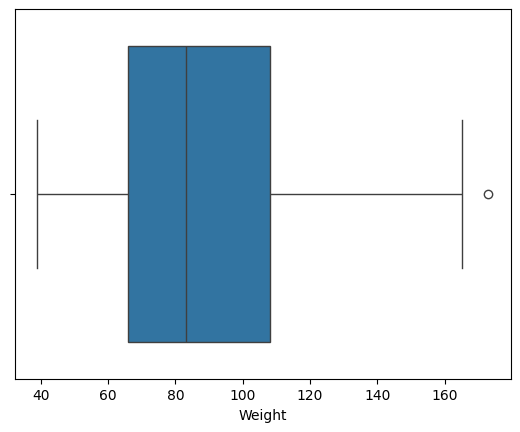

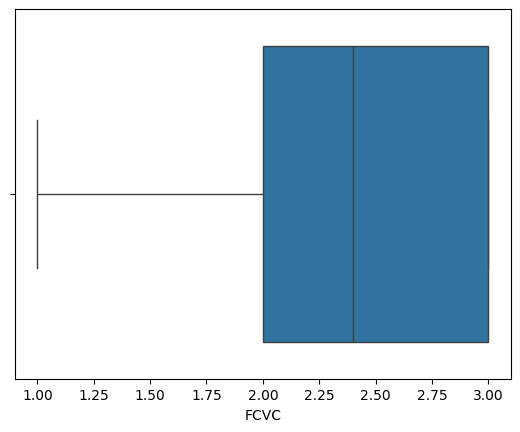

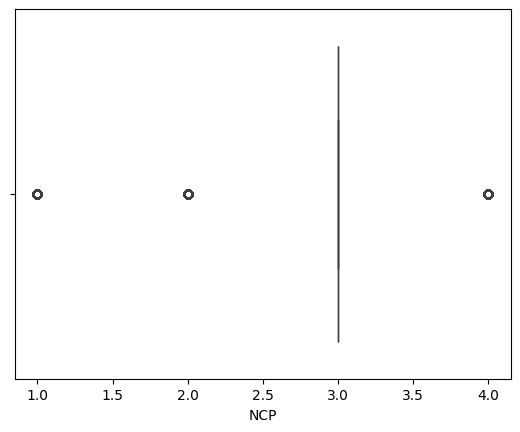

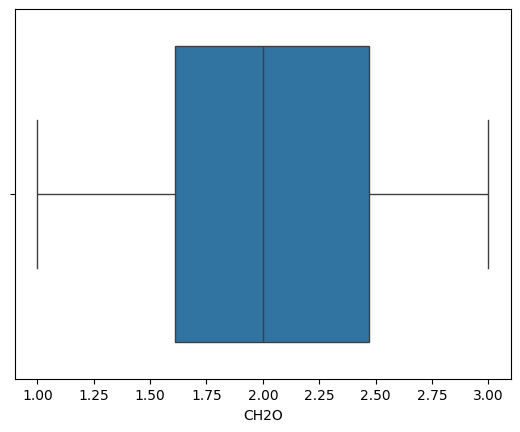

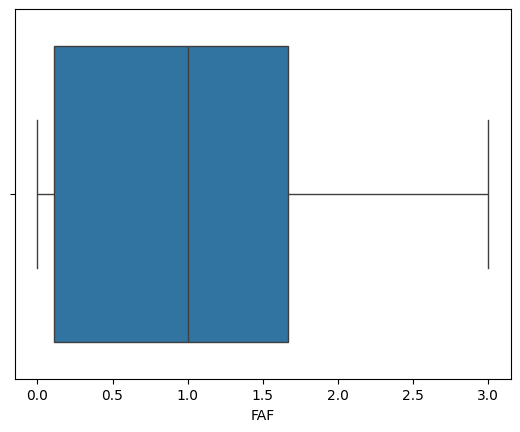

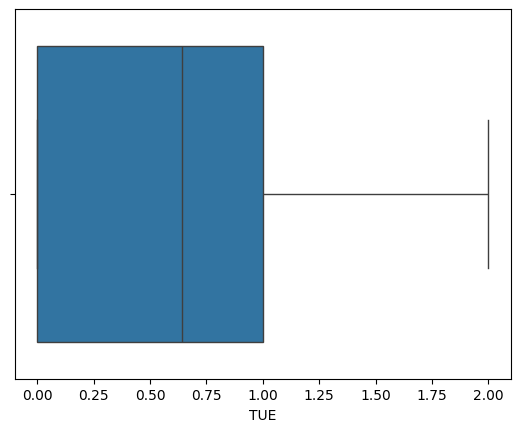

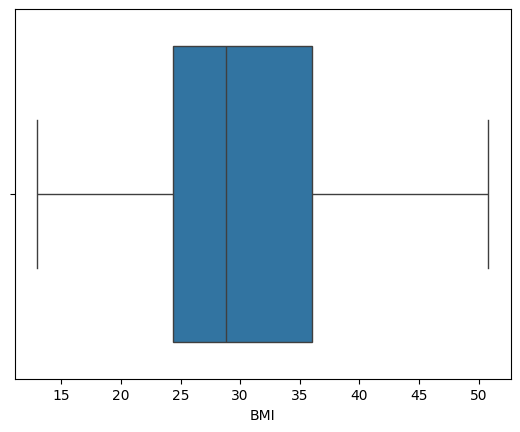

In [54]:
columns = dataTrain.columns
# box plot to check outliers
for col in columns:
    if not (dataTrain[col].dtype == 'object'):
        sns.boxplot(x=dataTrain[col])
        plt.show()

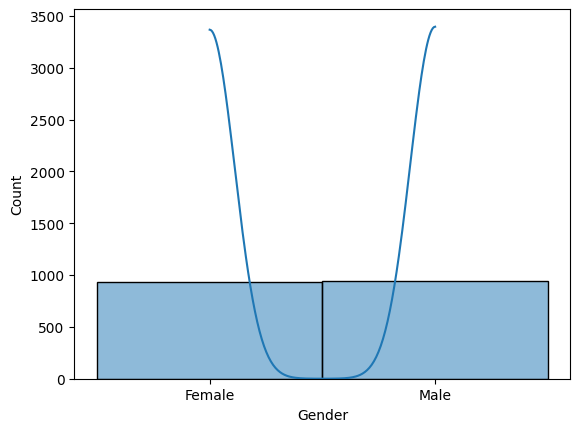

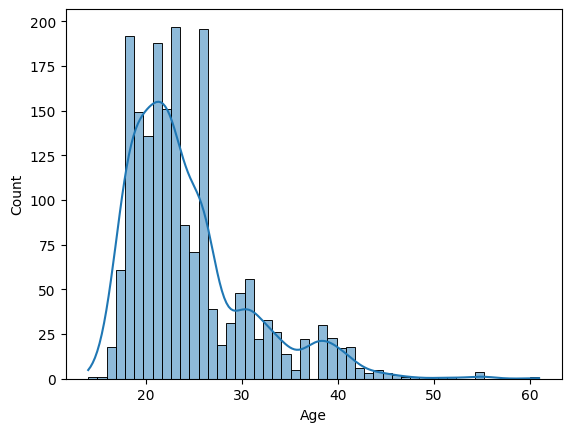

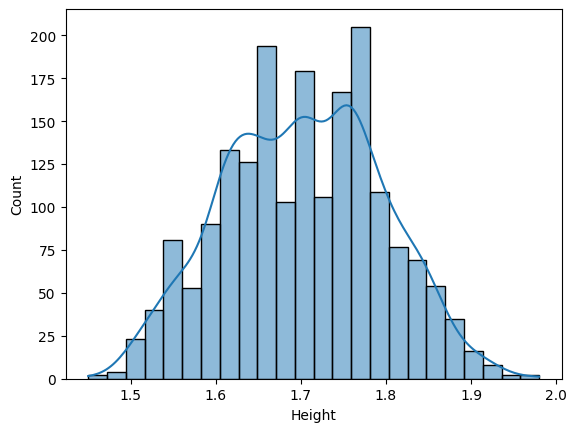

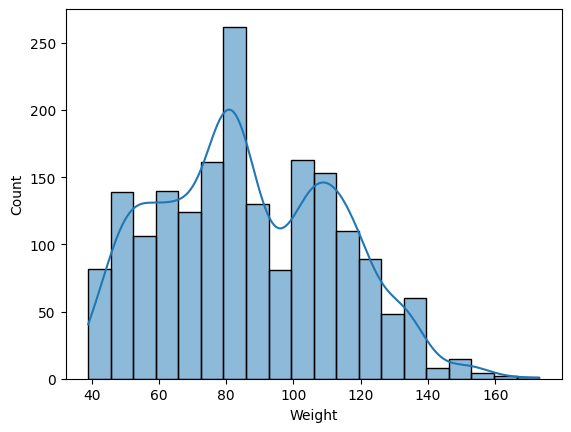

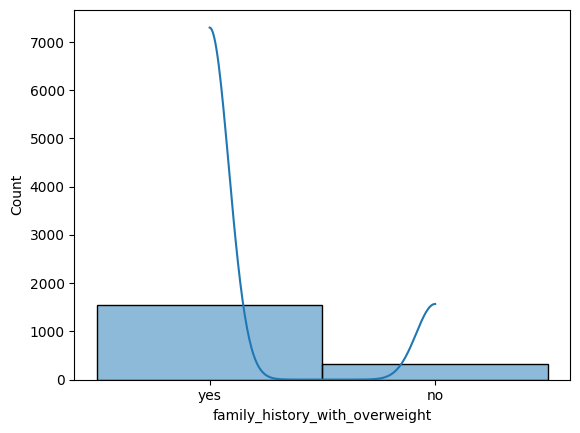

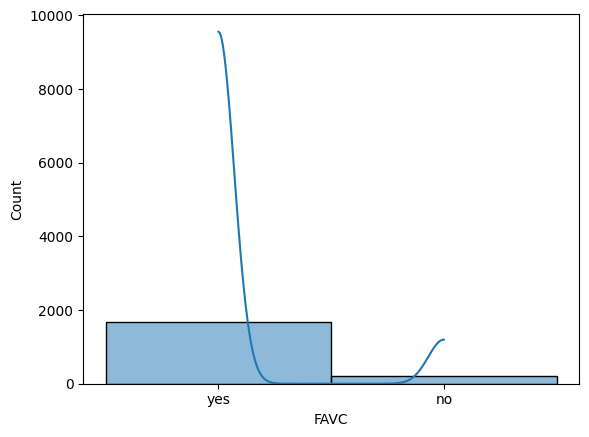

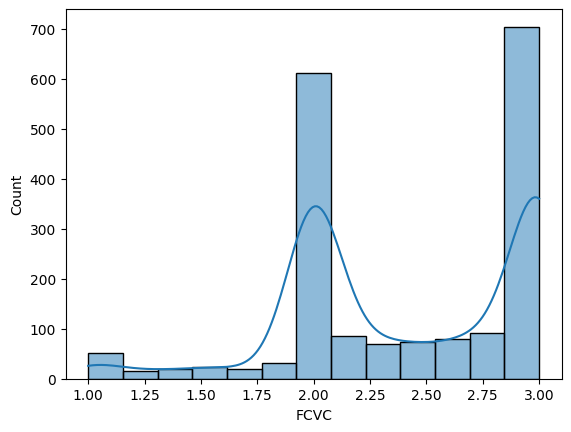

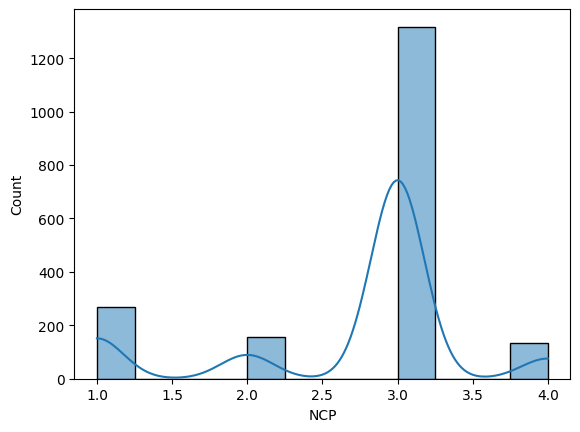

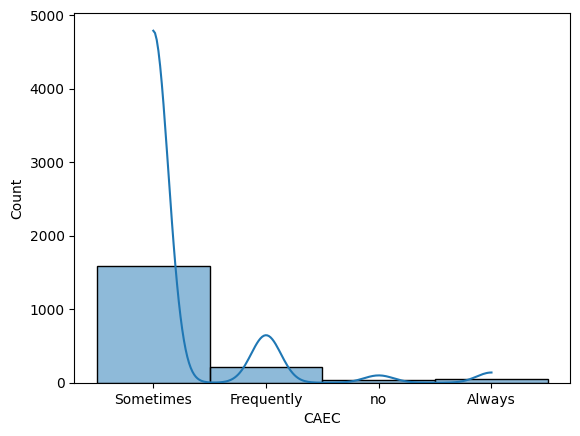

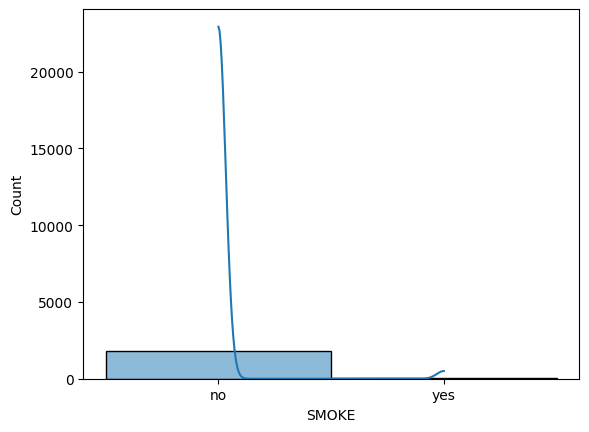

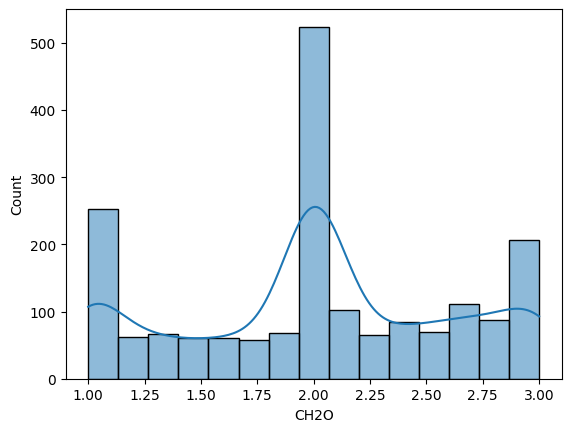

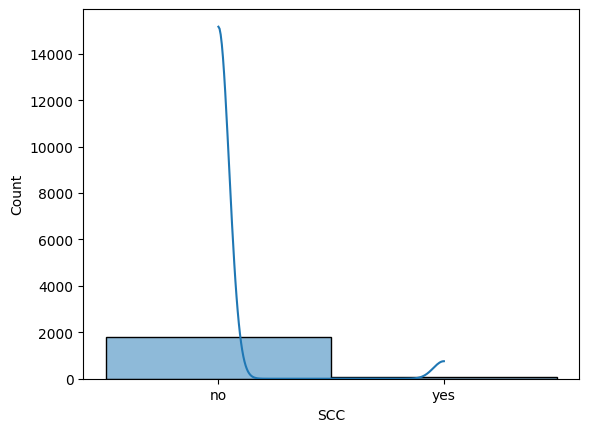

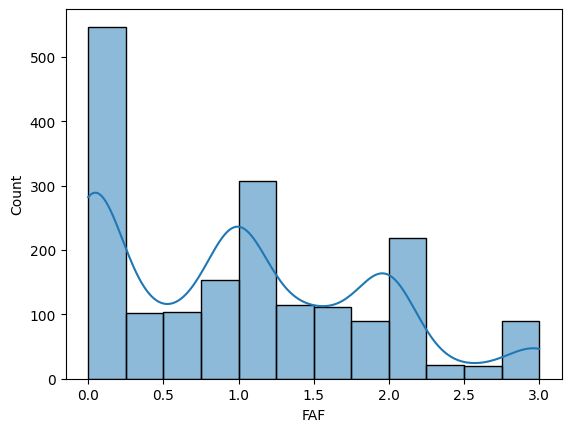

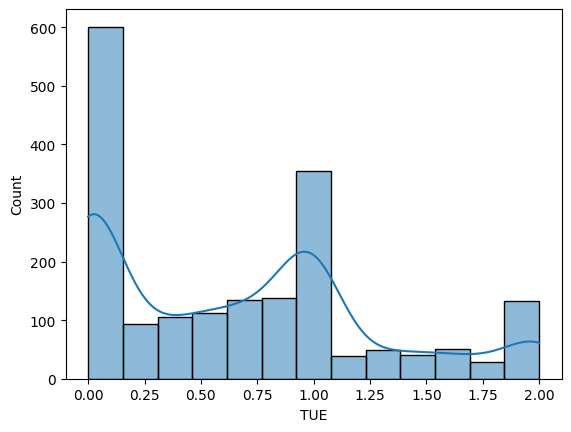

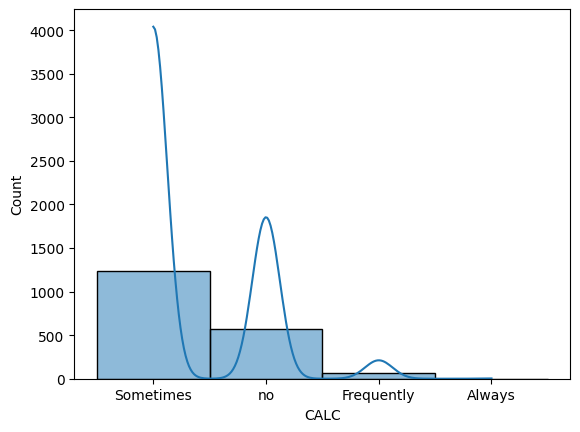

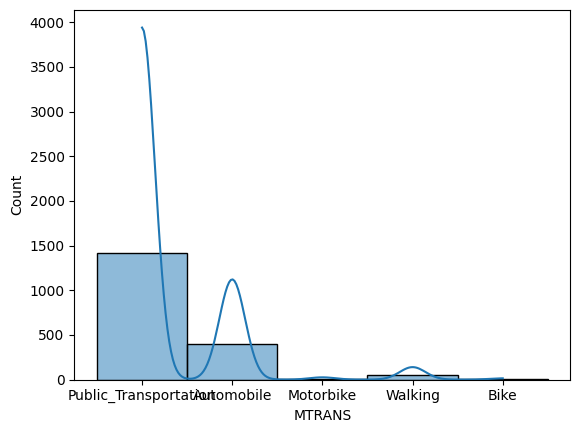

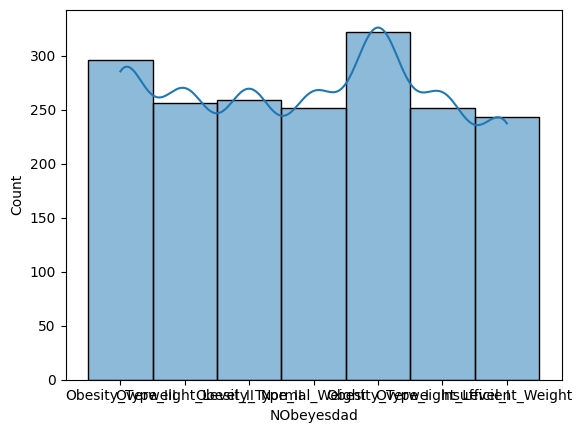

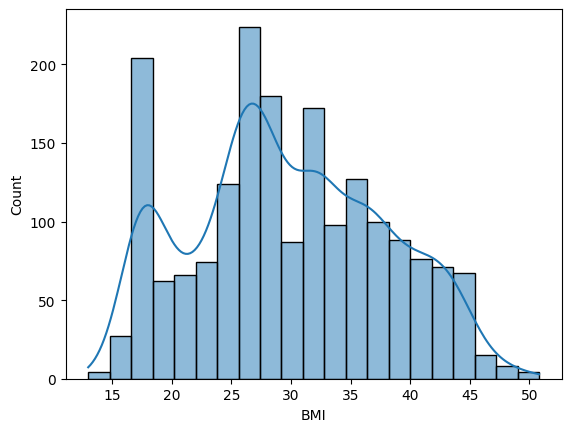

In [55]:
# Checking distribution of columns which have outliers
for col in columns:
    sns.histplot(x = dataTrain[col], kde=True)
    plt.show()

In [56]:
# Function to detect outliers using IQR method
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    return outliers

# Loop through the columns to find and display outliers
for col in dataTrain.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Analyzing '{col}' column...\n")

    # Find outliers
    outliers = find_outliers(dataTrain, col)

    num_outliers = len(outliers)  # Count of outliers
    total_values = len(dataTrain[col])  # Total rows in the column
    outlier_percentage = (num_outliers / total_values) * 100  # Percentage of outliers

    # Display outliers and their percentage
    print(f"Outliers in '{col}':\n{outliers[col].tolist()}\n")
    print(f"Number of outliers: {num_outliers}")
    print(f"Percentage of outliers: {outlier_percentage:.2f}%")
    print("="*50)


Analyzing 'Age' column...

Outliers in 'Age':
[37, 37, 40, 40, 40, 37, 42, 38, 52, 38, 36, 41, 41, 37, 38, 41, 38, 41, 44, 41, 37, 45, 45, 37, 37, 39, 55, 39, 39, 38, 39, 37, 38, 38, 41, 38, 37, 40, 40, 38, 39, 41, 41, 46, 42, 38, 40, 55, 43, 36, 37, 39, 39, 39, 39, 39, 37, 39, 39, 42, 61, 38, 37, 42, 40, 38, 40, 39, 36, 37, 40, 46, 37, 40, 39, 37, 38, 40, 38, 38, 38, 38, 42, 38, 38, 55, 41, 38, 40, 39, 39, 42, 43, 39, 51, 48, 37, 40, 37, 39, 38, 38, 39, 37, 38, 41, 39, 41, 41, 40, 44, 39, 44, 44, 38, 44, 39, 41, 55, 45, 38, 41, 37, 40, 41, 41, 38, 40, 37, 40, 36, 38, 38, 38, 37, 43, 37, 41, 39, 41, 38, 36, 47]

Number of outliers: 143
Percentage of outliers: 7.61%
Analyzing 'Height' column...

Outliers in 'Height':
[]

Number of outliers: 0
Percentage of outliers: 0.00%
Analyzing 'Weight' column...

Outliers in 'Weight':
[173.0]

Number of outliers: 1
Percentage of outliers: 0.05%
Analyzing 'FCVC' column...

Outliers in 'FCVC':
[]

Number of outliers: 0
Percentage of outliers: 0.00%
A

we will leave them becauce they make sense

# Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataTrain['Gender'] = label_encoder.fit_transform(dataTrain['Gender'])
dataTest['Gender'] = label_encoder.transform(dataTest['Gender'])

print(dataTrain['Gender'])
print(dataTest['Gender'])

0       0
1       1
2       1
3       0
4       1
       ..
1895    0
1896    1
1897    1
1898    1
1899    0
Name: Gender, Length: 1878, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
206    0
207    1
208    1
209    1
210    1
Name: Gender, Length: 211, dtype: int64


In [58]:


from sklearn.preprocessing import LabelEncoder

# Example: if target column is 'NObeyesdad' (Obesity labels)
label_encoder = LabelEncoder()
dataTrain['family_history_with_overweight'] = label_encoder.fit_transform(dataTrain['family_history_with_overweight'])
dataTest['family_history_with_overweight'] = label_encoder.transform(dataTest['family_history_with_overweight'])

print(dataTrain['family_history_with_overweight'])
print(dataTest['family_history_with_overweight'])

0       1
1       1
2       1
3       1
4       1
       ..
1895    1
1896    1
1897    1
1898    1
1899    1
Name: family_history_with_overweight, Length: 1878, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
206    1
207    0
208    1
209    1
210    1
Name: family_history_with_overweight, Length: 211, dtype: int64


In [59]:

from sklearn.preprocessing import LabelEncoder

# Example: if target column is 'NObeyesdad' (Obesity labels)
label_encoder = LabelEncoder()
dataTrain['FAVC'] = label_encoder.fit_transform(dataTrain['FAVC'])
dataTest['FAVC'] = label_encoder.transform(dataTest['FAVC'])

print(dataTrain['FAVC'])
print(dataTest['FAVC'])

0       1
1       1
2       1
3       1
4       1
       ..
1895    1
1896    1
1897    1
1898    1
1899    1
Name: FAVC, Length: 1878, dtype: int64
0      1
1      1
2      0
3      1
4      1
      ..
206    1
207    1
208    0
209    1
210    1
Name: FAVC, Length: 211, dtype: int64


In [60]:


CAEC_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Apply the mapping to the CALC column
dataTrain['CAEC'] = dataTrain['CAEC'].map(CAEC_mapping)
dataTest['CAEC'] = dataTest['CAEC'].map(CAEC_mapping)

print(dataTrain['CAEC'])
print(dataTest['CAEC'])

0       1
1       1
2       1
3       1
4       1
       ..
1895    1
1896    1
1897    1
1898    1
1899    1
Name: CAEC, Length: 1878, dtype: int64
0      1
1      2
2      1
3      1
4      1
      ..
206    1
207    2
208    1
209    1
210    3
Name: CAEC, Length: 211, dtype: int64


In [61]:

from sklearn.preprocessing import LabelEncoder

# Example: if target column is 'NObeyesdad' (Obesity labels)
label_encoder = LabelEncoder()
dataTrain['SMOKE'] = label_encoder.fit_transform(dataTrain['SMOKE'])
dataTest['SMOKE'] = label_encoder.transform(dataTest['SMOKE'])

print(dataTrain['SMOKE'])
print(dataTest['SMOKE'])

0       0
1       0
2       0
3       0
4       0
       ..
1895    0
1896    0
1897    0
1898    0
1899    0
Name: SMOKE, Length: 1878, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    1
210    0
Name: SMOKE, Length: 211, dtype: int64


In [62]:

label_encoder = LabelEncoder()
dataTrain['SCC'] = label_encoder.fit_transform(dataTrain['SCC'])
dataTest['SCC'] = label_encoder.transform(dataTest['SCC'])

print(dataTrain['SCC'])
print(dataTest['SCC'])

0       0
1       0
2       0
3       0
4       0
       ..
1895    0
1896    0
1897    0
1898    0
1899    0
Name: SCC, Length: 1878, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: SCC, Length: 211, dtype: int64


In [63]:

dataTrain = pd.get_dummies(dataTrain, columns=['MTRANS'])
dataTest = pd.get_dummies(dataTest, columns=['MTRANS'])

dataTrain = dataTrain.astype({col: int for col in dataTrain.select_dtypes('bool').columns})
dataTest = dataTest.astype({col: int for col in dataTest.select_dtypes('bool').columns})

dataTrain.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,NObeyesdad,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,18,1.82,142.10,1,1,3.000000,3.0,1,0,...,2.00,0.814,Sometimes,Obesity_Type_III,42.899408,0,0,0,1,0
1,1,32,1.84,98.26,1,1,2.330000,2.0,1,0,...,1.33,0.481,Sometimes,Overweight_Level_II,29.022921,1,0,0,0,0
2,1,24,1.76,117.33,1,1,1.540000,3.0,1,0,...,1.63,0.631,Sometimes,Obesity_Type_II,37.877712,0,0,0,1,0
3,0,26,1.62,110.68,1,1,3.000000,3.0,1,0,...,0.00,0.425,Sometimes,Obesity_Type_III,42.173449,0,0,0,1,0
4,1,32,1.78,121.20,1,1,2.760000,3.0,1,0,...,0.43,0.716,Sometimes,Obesity_Type_II,38.252746,1,0,0,0,0
5,1,33,1.85,85.00,0,1,2.417272,3.0,2,0,...,1.00,0.000,Sometimes,Normal_Weight,24.835646,1,0,0,0,0
6,0,32,1.67,90.00,1,1,2.417272,1.0,1,0,...,2.00,0.000,Sometimes,Obesity_Type_I,32.270788,1,0,0,0,0
7,0,27,1.55,62.88,0,1,2.417272,2.0,1,0,...,0.79,0.395,Sometimes,Overweight_Level_I,26.172737,0,0,0,1,0
8,0,19,1.68,127.43,1,1,2.417272,3.0,1,0,...,1.43,0.662,Sometimes,Obesity_Type_III,45.149518,0,0,0,1,0
9,0,26,1.61,107.01,1,1,3.000000,3.0,1,0,...,0.00,0.509,Sometimes,Obesity_Type_III,41.283130,0,0,0,1,0


In [64]:
dataTest.head(10)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,35,1.71,84.72,1,1,2.88,3.00,1,0,...,0,2.00,0.832,no,Overweight_Level_II,1,0,0,0,0
1,1,19,1.75,100.00,1,1,2.00,3.00,2,0,...,0,2.00,0.000,no,Obesity_Type_I,0,0,0,1,0
2,1,19,1.85,65.00,1,0,2.00,3.00,1,0,...,0,2.00,1.000,Sometimes,Normal_Weight,0,1,0,0,0
3,1,31,1.78,120.64,1,1,2.50,3.00,1,0,...,0,0.84,0.490,Sometimes,Obesity_Type_II,1,0,0,0,0
4,1,25,1.80,120.90,1,1,2.20,3.00,1,0,...,0,1.66,0.128,Sometimes,Obesity_Type_II,0,0,0,1,0
5,0,25,1.51,63.72,1,0,2.00,1.19,1,0,...,0,0.55,0.236,no,Overweight_Level_II,0,0,0,1,0
6,0,22,1.60,66.40,1,1,2.11,3.00,1,0,...,0,1.91,0.000,Sometimes,Overweight_Level_I,0,0,0,1,0
7,1,17,1.75,70.00,1,0,2.00,3.00,1,0,...,0,3.00,2.000,Sometimes,Normal_Weight,0,0,0,0,1
8,1,25,1.60,101.04,1,1,3.00,1.13,1,0,...,0,0.07,1.552,no,Obesity_Type_II,0,0,0,1,0
9,0,26,1.63,105.43,1,1,3.00,3.00,1,0,...,0,0.10,0.663,Sometimes,Obesity_Type_III,0,0,0,1,0


In [65]:

calc_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Apply the mapping to the CALC column
dataTrain['CALC'] = dataTrain['CALC'].map(calc_mapping)
dataTest['CALC'] = dataTest['CALC'].map(calc_mapping)

print(dataTrain['CALC'])
print(dataTest['CALC'])

0       1
1       1
2       1
3       1
4       1
       ..
1895    0
1896    0
1897    1
1898    0
1899    1
Name: CALC, Length: 1878, dtype: int64
0      0
1      0
2      1
3      1
4      1
      ..
206    1
207    1
208    1
209    1
210    1
Name: CALC, Length: 211, dtype: int64


In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataTrain['NObeyesdad'] = label_encoder.fit_transform(dataTrain['NObeyesdad'])
dataTest['NObeyesdad'] = label_encoder.transform(dataTest['NObeyesdad'])

print(dataTrain['NObeyesdad'])
print(dataTest['NObeyesdad'])

0       4
1       6
2       3
3       4
4       3
       ..
1895    2
1896    3
1897    3
1898    2
1899    2
Name: NObeyesdad, Length: 1878, dtype: int64
0      6
1      2
2      1
3      3
4      3
      ..
206    4
207    1
208    3
209    3
210    2
Name: NObeyesdad, Length: 211, dtype: int64


# ----------Testing Data----------


# Checking for the testing data

In [67]:
dataTest.shape

(211, 21)

In [68]:
dataTest.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.521327,24.601896,1.703460,87.222417,0.838863,0.838863,2.415450,2.709810,1.151659,0.018957,...,0.033175,1.062607,0.606374,0.720379,3.080569,0.255924,0.009479,0.009479,0.701422,0.023697
std,0.500733,6.964727,0.096159,26.550921,0.368532,0.368532,0.514483,0.758233,0.493515,0.136699,...,0.179520,0.826448,0.609727,0.500011,1.963513,0.437417,0.097126,0.097126,0.458723,0.152464
min,0.000000,16.000000,1.480000,39.850000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.630000,65.000000,1.000000,1.000000,2.000000,2.745000,1.000000,0.000000,...,0.000000,0.260000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,23.000000,1.710000,82.130000,1.000000,1.000000,2.350000,3.000000,1.000000,0.000000,...,0.000000,1.000000,0.490000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,26.000000,1.770000,108.860000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,...,0.000000,1.725000,1.000000,1.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,56.000000,1.910000,160.640000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,...,1.000000,3.000000,2.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          211 non-null    int64  
 1   Age                             211 non-null    int64  
 2   Height                          211 non-null    float64
 3   Weight                          211 non-null    float64
 4   family_history_with_overweight  211 non-null    int64  
 5   FAVC                            211 non-null    int64  
 6   FCVC                            211 non-null    float64
 7   NCP                             211 non-null    float64
 8   CAEC                            211 non-null    int64  
 9   SMOKE                           211 non-null    int64  
 10  CH2O                            211 non-null    float64
 11  SCC                             211 non-null    int64  
 12  FAF                             211 

In [70]:
dataTest.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,35,1.71,84.72,1,1,2.88,3.00,1,0,...,0,2.00,0.832,0,6,1,0,0,0,0
1,1,19,1.75,100.00,1,1,2.00,3.00,2,0,...,0,2.00,0.000,0,2,0,0,0,1,0
2,1,19,1.85,65.00,1,0,2.00,3.00,1,0,...,0,2.00,1.000,1,1,0,1,0,0,0
3,1,31,1.78,120.64,1,1,2.50,3.00,1,0,...,0,0.84,0.490,1,3,1,0,0,0,0
4,1,25,1.80,120.90,1,1,2.20,3.00,1,0,...,0,1.66,0.128,1,3,0,0,0,1,0
5,0,25,1.51,63.72,1,0,2.00,1.19,1,0,...,0,0.55,0.236,0,6,0,0,0,1,0
6,0,22,1.60,66.40,1,1,2.11,3.00,1,0,...,0,1.91,0.000,1,5,0,0,0,1,0
7,1,17,1.75,70.00,1,0,2.00,3.00,1,0,...,0,3.00,2.000,1,1,0,0,0,0,1
8,1,25,1.60,101.04,1,1,3.00,1.13,1,0,...,0,0.07,1.552,0,3,0,0,0,1,0
9,0,26,1.63,105.43,1,1,3.00,3.00,1,0,...,0,0.10,0.663,1,4,0,0,0,1,0


In [71]:
dataTest.dtypes

Gender                              int64
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
NObeyesdad                          int64
MTRANS_Automobile                   int64
MTRANS_Bike                         int64
MTRANS_Motorbike                    int64
MTRANS_Public_Transportation        int64
MTRANS_Walking                      int64
dtype: object

Data preprocessing

# Checking for nulls test

In [72]:
dataTest.isnull()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
207,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
208,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
dataTest.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
NObeyesdad                        0
MTRANS_Automobile                 0
MTRANS_Bike                       0
MTRANS_Motorbike                  0
MTRANS_Public_Transportation      0
MTRANS_Walking                    0
dtype: int64

In [74]:
dataTest.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,35,1.71,84.72,1,1,2.88,3.0,1,0,...,0,2.00,0.832,0,6,1,0,0,0,0
1,1,19,1.75,100.00,1,1,2.00,3.0,2,0,...,0,2.00,0.000,0,2,0,0,0,1,0
2,1,19,1.85,65.00,1,0,2.00,3.0,1,0,...,0,2.00,1.000,1,1,0,1,0,0,0
3,1,31,1.78,120.64,1,1,2.50,3.0,1,0,...,0,0.84,0.490,1,3,1,0,0,0,0
4,1,25,1.80,120.90,1,1,2.20,3.0,1,0,...,0,1.66,0.128,1,3,0,0,0,1,0


# Checking for duplicates test

In [75]:
dataTest.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
206    False
207    False
208    False
209    False
210    False
Length: 211, dtype: bool

In [76]:
dataTest.duplicated().sum()

np.int64(0)

In [77]:
print(f"Total duplicates: {dataTest.duplicated().sum()}")

Total duplicates: 0


In [78]:
dataTest.shape

(211, 21)

# Checking for wrong format test

In [79]:
dataTest['Gender'].unique()

array([1, 0])

In [80]:
dataTest['Age'].unique()

array([35, 19, 31, 25, 22, 17, 26, 24, 21, 38, 18, 30, 29, 16, 20, 23, 33,
       37, 28, 56, 36, 39, 27, 55, 51, 44, 40, 32, 34, 41])

In [81]:
dataTest['Weight'].unique()

array([ 84.72, 100.  ,  65.  , 120.64, 120.9 ,  63.72,  66.4 ,  70.  ,
       101.04, 105.43,  72.11, 120.92,  90.14,  57.  ,  77.22,  71.  ,
       129.23,  72.  ,  50.  ,  89.43,  79.11,  73.5 , 104.27,  98.18,
       135.69, 121.53, 115.38,  82.  ,  82.02,  84.9 , 120.86,  75.  ,
        60.  , 105.97, 103.02, 104.77,  88.13, 103.67,  82.97, 104.99,
       118.21, 112.47,  68.98, 138.14,  89.67, 129.77,  79.  ,  89.94,
        54.57,  86.75,  63.89, 118.38,  61.  ,  85.2 ,  78.04,  42.  ,
        90.  ,  54.88,  69.5 ,  68.77, 117.79, 160.64, 153.15, 115.35,
        48.  , 119.84, 125.  , 109.21, 107.48, 125.42, 111.83, 118.28,
        93.09, 133.89, 119.2 ,  74.96, 117.76,  80.99,  63.  ,  55.  ,
        76.  , 108.32, 114.25, 135.52,  80.  , 110.92,  39.85,  59.31,
        96.95, 121.41,  83.52,  74.  , 110.71,  42.66, 111.95,  82.41,
        82.13,  71.73,  84.34,  51.44,  68.  , 104.57,  97.  , 105.62,
       128.86, 111.87,  77.97,  83.39, 113.28, 117.65, 101.48, 120.  ,
      

In [82]:
dataTest['Height'].unique()

array([1.71, 1.75, 1.85, 1.78, 1.8 , 1.51, 1.6 , 1.63, 1.62, 1.5 , 1.81,
       1.66, 1.68, 1.54, 1.91, 1.74, 1.83, 1.59, 1.64, 1.87, 1.79, 1.65,
       1.77, 1.7 , 1.67, 1.73, 1.76, 1.69, 1.84, 1.53, 1.58, 1.82, 1.72,
       1.57, 1.61, 1.56, 1.55, 1.48, 1.86, 1.89])

In [83]:
dataTest['FAVC'].unique()

array([1, 0])

In [84]:
dataTest['FCVC'].unique()

array([2.88, 2.  , 2.5 , 2.2 , 2.11, 3.  , 2.59, 2.44, 2.02, 2.31, 2.34,
       2.87, 2.74, 1.74, 1.75, 2.4 , 2.6 , 2.46, 2.27, 2.09, 2.3 , 1.14,
       2.16, 2.82, 1.84, 2.78, 2.75, 1.45, 2.23, 2.19, 2.35, 2.24, 2.72,
       1.88, 2.29, 2.07, 2.18, 1.21, 2.43, 1.59, 2.69, 1.79, 2.9 , 2.64,
       2.98, 2.63, 2.67, 2.84, 2.25, 2.03, 1.  , 2.52, 2.01, 2.21, 2.85,
       1.04, 2.51, 2.37, 2.06, 2.47, 2.53, 2.65, 2.56, 2.91, 2.58, 1.34,
       2.93, 1.17, 2.94, 2.89, 2.83, 2.32, 2.12, 1.65])

In [85]:
dataTest['NCP'].unique()

array([3.  , 1.19, 1.13, 3.88, 2.96, 1.81, 4.  , 3.56, 3.61, 1.  , 2.4 ,
       1.57, 2.98, 2.74, 2.18, 2.05, 3.99, 3.31, 1.39, 3.95, 2.92, 1.87,
       1.47, 1.24, 2.99, 1.56, 1.94, 1.72, 2.6 , 2.71, 3.91, 2.63, 1.02,
       3.34, 1.14, 2.11, 3.05, 1.74, 2.95, 2.64, 1.41, 1.93, 1.11, 1.82,
       3.26, 3.75, 3.25, 1.27, 3.13, 2.1 , 3.94, 1.95, 1.68, 2.37, 2.88,
       2.75])

In [86]:
dataTest['CAEC'].unique()

array([1, 2, 3, 0])

In [87]:
dataTest['SMOKE'].unique()

array([0, 1])

In [88]:
dataTest['CH2O'].unique()

array([3.  , 2.  , 2.04, 2.51, 1.85, 2.75, 1.  , 1.27, 1.48, 2.31, 2.17,
       1.03, 1.8 , 1.79, 2.88, 1.51, 1.53, 2.67, 1.66, 1.82, 1.04, 2.49,
       2.07, 2.27, 1.2 , 2.08, 2.2 , 2.82, 1.15, 1.99, 2.65, 1.28, 2.5 ,
       1.32, 2.01, 2.11, 1.83, 2.4 , 2.39, 2.1 , 2.12, 2.73, 2.44, 2.69,
       1.12, 2.55, 2.68, 1.16, 2.42, 1.96, 2.54, 2.71, 2.13, 1.49, 1.6 ,
       1.18, 2.47, 2.05, 2.28, 1.97, 2.84, 2.79, 2.02, 1.77, 2.72, 1.62,
       2.64, 1.4 , 1.64, 1.92, 2.58, 1.73, 2.18, 2.21, 2.15, 2.83, 1.86,
       2.8 , 1.37, 2.09, 2.23, 2.53, 2.99, 2.89, 2.66, 2.16, 1.52, 1.46,
       2.95, 1.01, 2.81, 1.11, 2.19, 2.74, 1.57, 1.13])

In [89]:
dataTest['SCC'].unique()

array([0, 1])

In [90]:
dataTest['FAF'].unique()

array([2.  , 0.84, 1.66, 0.55, 1.91, 3.  , 0.07, 0.1 , 1.  , 1.49, 0.34,
       0.  , 1.2 , 1.93, 0.85, 0.17, 2.46, 1.09, 1.39, 0.22, 0.61, 1.99,
       0.18, 1.36, 1.75, 0.95, 0.09, 0.6 , 0.83, 1.57, 0.75, 1.72, 2.11,
       0.98, 0.02, 1.23, 1.78, 0.86, 0.46, 0.51, 0.76, 0.43, 1.33, 0.77,
       0.69, 0.88, 1.24, 1.56, 1.22, 1.31, 1.95, 2.85, 0.03, 0.68, 2.7 ,
       1.74, 0.97, 0.67, 0.24, 0.94, 2.23, 2.01, 0.32, 1.85, 1.65, 1.12,
       0.41, 0.48, 2.64, 1.08, 1.59, 0.81, 1.1 , 1.98, 1.63, 2.12, 2.72,
       0.31, 0.04, 2.89, 0.11, 1.46, 1.68, 0.39, 0.9 , 0.99, 1.94, 0.66,
       1.17, 1.3 , 2.29, 2.27, 0.28, 1.25, 1.96, 1.07, 1.55, 0.33, 1.29,
       1.47, 1.73, 0.21])

In [91]:
dataTest['TUE'].unique()

array([0.832, 0.   , 1.   , 0.49 , 0.128, 0.236, 2.   , 1.552, 0.663,
       0.282, 0.02 , 0.829, 0.208, 1.368, 1.402, 0.787, 0.392, 0.302,
       1.196, 0.708, 0.58 , 0.748, 1.731, 0.604, 0.725, 0.573, 0.688,
       0.959, 0.143, 0.078, 0.872, 0.84 , 0.801, 0.071, 1.195, 0.64 ,
       0.656, 0.381, 0.189, 0.802, 0.411, 0.552, 0.196, 0.931, 1.541,
       0.874, 0.647, 0.388, 0.038, 1.426, 0.079, 0.869, 1.413, 0.2  ,
       1.887, 1.253, 0.08 , 0.289, 1.251, 0.176, 0.425, 0.088, 0.968,
       0.463, 0.707, 1.503, 0.839, 0.859, 0.673, 1.306, 0.233, 0.329,
       0.419, 1.27 , 1.041, 1.529, 0.219, 0.481, 0.962, 1.287, 0.284,
       0.145, 1.844, 0.31 , 1.673, 0.768, 1.115, 1.301, 0.941, 1.754,
       0.937, 0.412, 1.128, 0.976, 0.277, 0.576, 0.002, 0.687, 1.11 ,
       0.777, 0.555, 0.665, 0.954, 0.267, 0.213, 1.556, 0.519, 0.322,
       1.62 , 0.037, 0.882, 1.023])

In [92]:
dataTest['NObeyesdad'].unique()

array([6, 2, 1, 3, 5, 4, 0])

# Feature engineering test

his creates a new feature BMI (Body Mass Index) using the existing features Weight and Height. The BMI is a common metric used to assess body weight in relation to height and can be very informative when analyzing obesity-related data

In [93]:
dataTest['BMI'] = (dataTest['Weight']/dataTest['Height']**2)

In [94]:
dataTest.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI
0,1,35,1.71,84.72,1,1,2.88,3.0,1,0,...,2.00,0.832,0,6,1,0,0,0,0,28.973017
1,1,19,1.75,100.00,1,1,2.00,3.0,2,0,...,2.00,0.000,0,2,0,0,0,1,0,32.653061
2,1,19,1.85,65.00,1,0,2.00,3.0,1,0,...,2.00,1.000,1,1,0,1,0,0,0,18.991965
3,1,31,1.78,120.64,1,1,2.50,3.0,1,0,...,0.84,0.490,1,3,1,0,0,0,0,38.076001
4,1,25,1.80,120.90,1,1,2.20,3.0,1,0,...,1.66,0.128,1,3,0,0,0,1,0,37.314815


# Check for correlation of the data

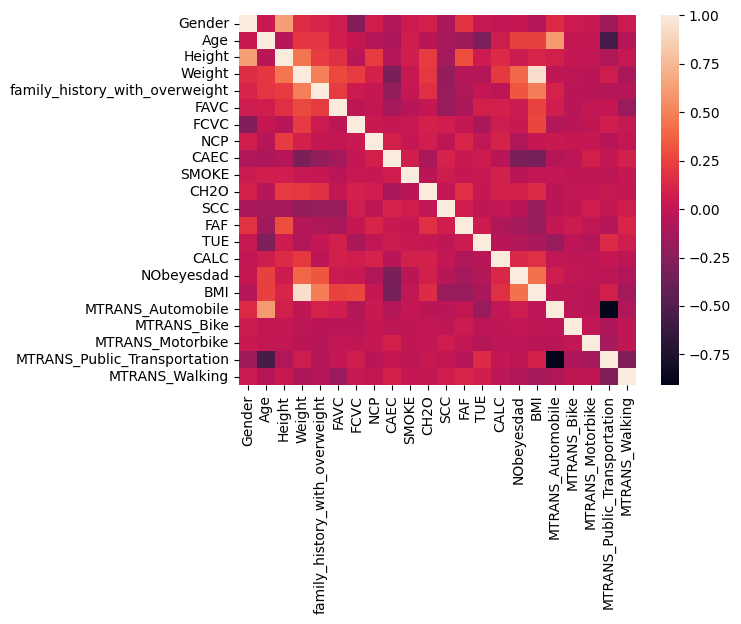

In [95]:
# plot correlation with heat map
sns.heatmap(dataTrain.corr())
plt.show()

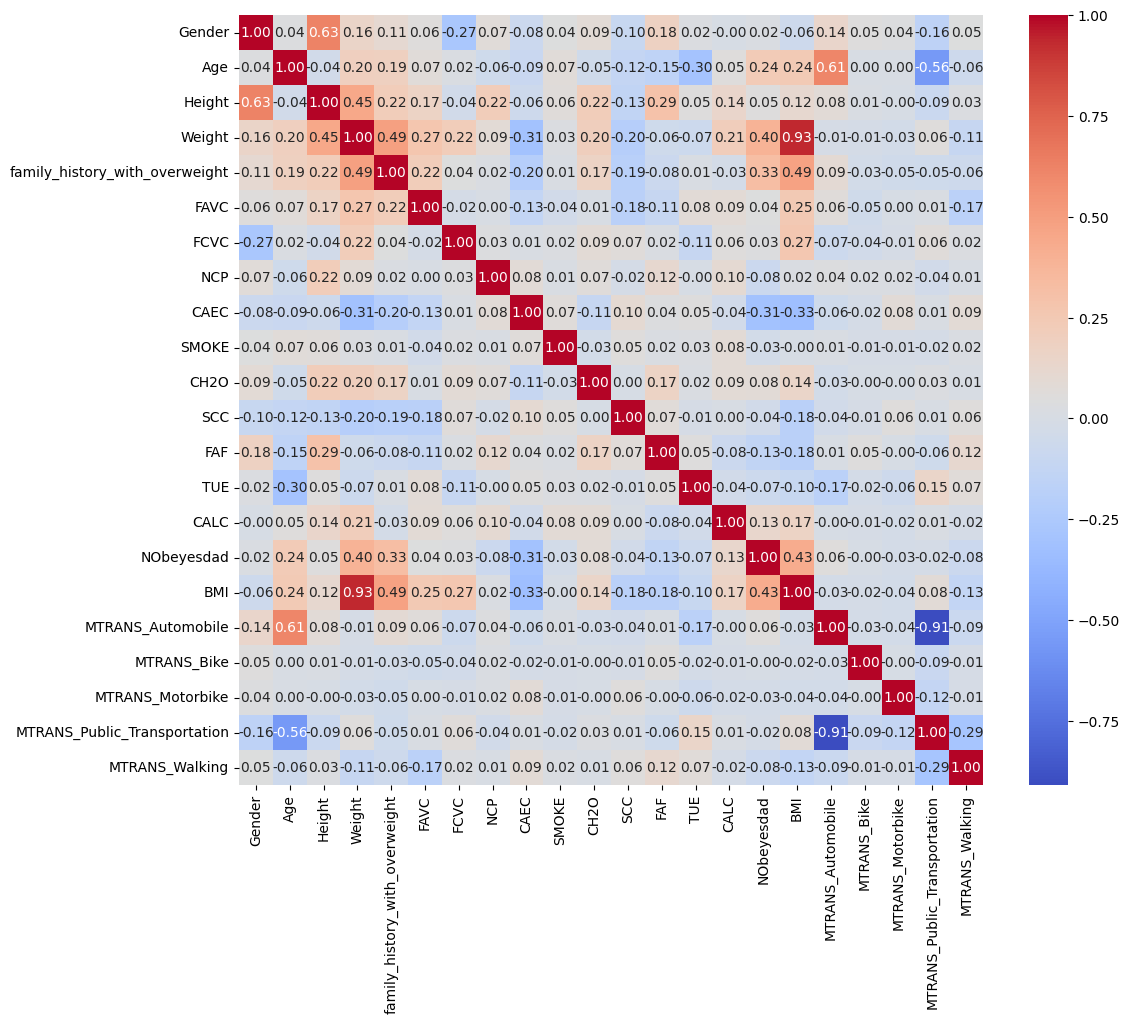

In [96]:
# Calculate the correlation matrix

## Select only numerical columns
# numerical_columns = data.select_dtypes(include=np.number).columns.drop("NObeyesdad")
correlation_matrix = dataTrain[:].corr()

plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Gender                            0.021047
Age                               0.235009
Height                            0.051988
Weight                            0.395615
family_history_with_overweight    0.327173
FAVC                              0.041267
FCVC                              0.033423
NCP                              -0.079529
CAEC                             -0.307936
SMOKE                            -0.034626
CH2O                              0.079457
SCC                              -0.043276
FAF                              -0.133255
TUE                              -0.069097
CALC                              0.130108
BMI                               0.431656
MTRANS_Automobile                 0.056829
MTRANS_Bike                      -0.000184
MTRANS_Motorbike                 -0.027972
MTRANS_Public_Transportation     -0.020122
MTRANS_Walking                   -0.078748
dtype: float64


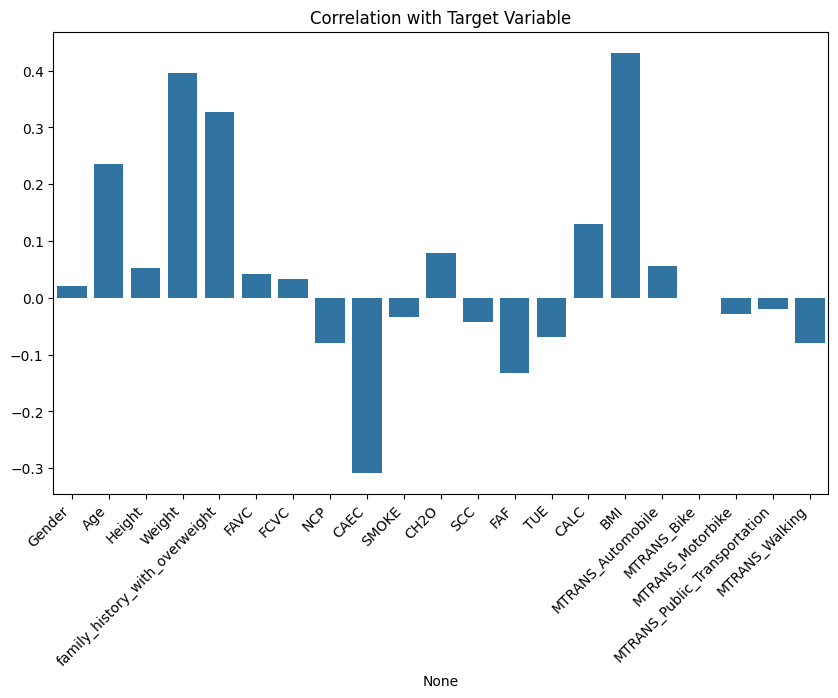

In [97]:
# Calculate the correlation between numerical features and the label
columns_without_target = dataTrain.select_dtypes(include=np.number).columns.drop("NObeyesdad")
correlations_with_target = dataTrain[columns_without_target].corrwith(dataTrain['NObeyesdad'])

# Display the correlation values
print(correlations_with_target)

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation with Target Variable')
plt.show()

In [98]:
sorted_features = correlations_with_target.abs().sort_values(ascending=False)

# Print or visualize the sorted features
print(sorted_features)

BMI                               0.431656
Weight                            0.395615
family_history_with_overweight    0.327173
CAEC                              0.307936
Age                               0.235009
FAF                               0.133255
CALC                              0.130108
NCP                               0.079529
CH2O                              0.079457
MTRANS_Walking                    0.078748
TUE                               0.069097
MTRANS_Automobile                 0.056829
Height                            0.051988
SCC                               0.043276
FAVC                              0.041267
SMOKE                             0.034626
FCVC                              0.033423
MTRANS_Motorbike                  0.027972
Gender                            0.021047
MTRANS_Public_Transportation      0.020122
MTRANS_Bike                       0.000184
dtype: float64


# feature selection

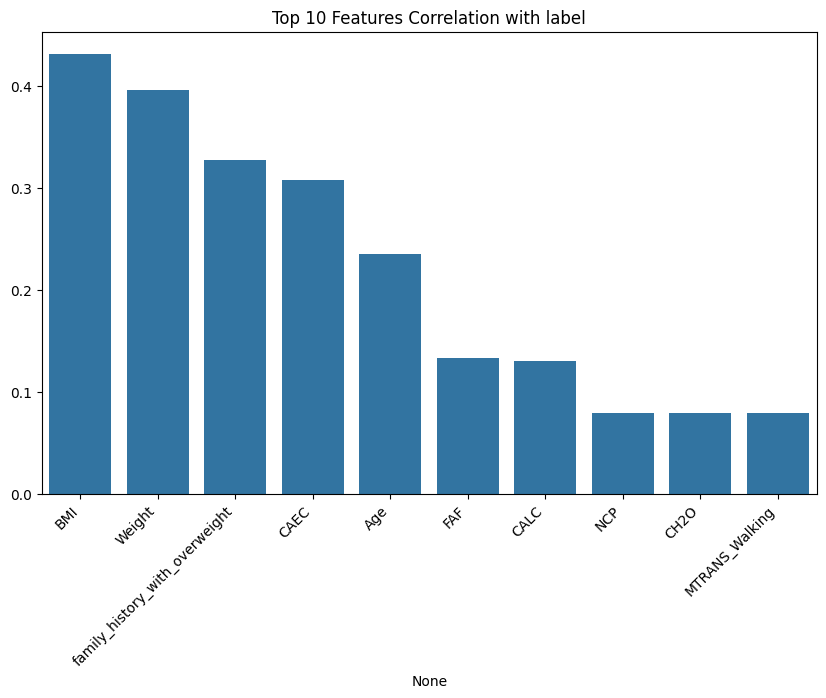

In [99]:
# Plot the top N features
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.index[:top_n], y=sorted_features.values[:top_n])
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {top_n} Features Correlation with label')
plt.show()


In [100]:
dataTrain.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,NObeyesdad,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,18,1.82,142.10,1,1,3.000000,3.0,1,0,...,2.00,0.814,1,4,42.899408,0,0,0,1,0
1,1,32,1.84,98.26,1,1,2.330000,2.0,1,0,...,1.33,0.481,1,6,29.022921,1,0,0,0,0
2,1,24,1.76,117.33,1,1,1.540000,3.0,1,0,...,1.63,0.631,1,3,37.877712,0,0,0,1,0
3,0,26,1.62,110.68,1,1,3.000000,3.0,1,0,...,0.00,0.425,1,4,42.173449,0,0,0,1,0
4,1,32,1.78,121.20,1,1,2.760000,3.0,1,0,...,0.43,0.716,1,3,38.252746,1,0,0,0,0
5,1,33,1.85,85.00,0,1,2.417272,3.0,2,0,...,1.00,0.000,1,1,24.835646,1,0,0,0,0
6,0,32,1.67,90.00,1,1,2.417272,1.0,1,0,...,2.00,0.000,1,2,32.270788,1,0,0,0,0
7,0,27,1.55,62.88,0,1,2.417272,2.0,1,0,...,0.79,0.395,1,5,26.172737,0,0,0,1,0
8,0,19,1.68,127.43,1,1,2.417272,3.0,1,0,...,1.43,0.662,1,4,45.149518,0,0,0,1,0
9,0,26,1.61,107.01,1,1,3.000000,3.0,1,0,...,0.00,0.509,1,4,41.283130,0,0,0,1,0


# Applying Forward selection

In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Make a copy of the dataset for processing
data_copy = dataTrain.copy()

# Standardize numerical features (on the copy)
numerical_cols = data_copy.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'NObeyesdad']
scaler = StandardScaler()
data_copy[numerical_cols] = scaler.fit_transform(data_copy[numerical_cols])

# Forward Selection with Logistic Regression
selected_features_forward = []
remaining_features = [col for col in data_copy.columns if col != 'NObeyesdad']
scoring = 'accuracy'  # Or 'f1_weighted' for imbalanced classes
max_features = 10  # Match notebook's feature count

while len(remaining_features) > 0 and len(selected_features_forward) < max_features:
    best_score = -float('inf')
    best_feature = None

    for feature in remaining_features:
        features = selected_features_forward + [feature]
        X = data_copy[features]
        y = data_copy['NObeyesdad']

        # Use Logistic Regression for classification
        model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
        score = cross_val_score(model, X, y, cv=5, scoring=scoring).mean()

        if score > best_score:
            best_score = score
            best_feature = feature

    # Add feature if it improves performance
    if best_feature and best_score > 0:  # Ensure valid score
        selected_features_forward.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Selected Feature: {best_feature}, CV Score: {best_score:.4f}")
    else:
        print("Stopped: No improvement")
        break

# Display results
print("Final Selected Features:", selected_features_forward)
print("Number of Selected Features:", len(selected_features_forward))



Selected Feature: BMI, CV Score: 0.9153
Selected Feature: TUE, CV Score: 0.9223
Selected Feature: SCC, CV Score: 0.9249
Selected Feature: MTRANS_Bike, CV Score: 0.9244
Selected Feature: MTRANS_Motorbike, CV Score: 0.9233
Selected Feature: SMOKE, CV Score: 0.9185
Selected Feature: MTRANS_Automobile, CV Score: 0.9164
Selected Feature: FAF, CV Score: 0.9164
Selected Feature: NCP, CV Score: 0.9132
Selected Feature: MTRANS_Walking, CV Score: 0.9074
Final Selected Features: ['BMI', 'TUE', 'SCC', 'MTRANS_Bike', 'MTRANS_Motorbike', 'SMOKE', 'MTRANS_Automobile', 'FAF', 'NCP', 'MTRANS_Walking']
Number of Selected Features: 10


In [102]:
dataTrain.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,NObeyesdad,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,18,1.82,142.10,1,1,3.00,3.0,1,0,...,2.00,0.814,1,4,42.899408,0,0,0,1,0
1,1,32,1.84,98.26,1,1,2.33,2.0,1,0,...,1.33,0.481,1,6,29.022921,1,0,0,0,0
2,1,24,1.76,117.33,1,1,1.54,3.0,1,0,...,1.63,0.631,1,3,37.877712,0,0,0,1,0
3,0,26,1.62,110.68,1,1,3.00,3.0,1,0,...,0.00,0.425,1,4,42.173449,0,0,0,1,0
4,1,32,1.78,121.20,1,1,2.76,3.0,1,0,...,0.43,0.716,1,3,38.252746,1,0,0,0,0


# Applying Backward selection


In [103]:
import statsmodels.api as sm

# List to store selected features for backward elimination
selected_features_backward = []

# Set the significance level for feature removal
significance_level = 0.05

# Start with all features (excluding the target column)
remaining_features = list(dataTrain.columns)
remaining_features.remove('NObeyesdad')

# Start with all features selected (this will be updated as features are removed)
selected_features_backward = remaining_features.copy()

# Perform backward elimination
while len(selected_features_backward) > 0:
    # Fit the model with the current set of features
    X = dataTrain[selected_features_backward]
    X = sm.add_constant(X)  # Add constant term for intercept
    y = dataTrain['NObeyesdad']

    model = sm.OLS(y, X).fit()

    # Get p-values for all features
    p_values = model.pvalues[1:]  # Ignore the constant term (the first entry)

    # Find the feature with the highest p-value
    max_pvalue_value = p_values.max()
    max_pvalue_feature = p_values.idxmax()

    # Check if the highest p-value is above the significance level
    if max_pvalue_value > significance_level:
        # Remove the feature with the highest p-value
        selected_features_backward.remove(max_pvalue_feature)
        print(f"Removed Feature: {max_pvalue_feature}, P-value: {max_pvalue_value}")
    else:
        # Stop the process if no features have p-values above the significance level
        break

# Display the final selected features
print("Final Selected Features:", selected_features_backward)
print("The count of selected features:", len(selected_features_backward))


Removed Feature: CH2O, P-value: 0.9186761306687783
Removed Feature: Gender, P-value: 0.9185015753074534
Removed Feature: TUE, P-value: 0.4495735345731935
Removed Feature: FAF, P-value: 0.11425390732321682
Removed Feature: MTRANS_Bike, P-value: 0.05702210753651596
Removed Feature: MTRANS_Public_Transportation, P-value: 0.9823278786791599
Removed Feature: MTRANS_Motorbike, P-value: 0.8561738797733536
Removed Feature: MTRANS_Walking, P-value: 0.0949714294995536
Final Selected Features: ['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'BMI', 'MTRANS_Automobile']
The count of selected features: 13


In [104]:
dataTrain.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,NObeyesdad,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,18,1.82,142.10,1,1,3.00,3.0,1,0,...,2.00,0.814,1,4,42.899408,0,0,0,1,0
1,1,32,1.84,98.26,1,1,2.33,2.0,1,0,...,1.33,0.481,1,6,29.022921,1,0,0,0,0
2,1,24,1.76,117.33,1,1,1.54,3.0,1,0,...,1.63,0.631,1,3,37.877712,0,0,0,1,0
3,0,26,1.62,110.68,1,1,3.00,3.0,1,0,...,0.00,0.425,1,4,42.173449,0,0,0,1,0
4,1,32,1.78,121.20,1,1,2.76,3.0,1,0,...,0.43,0.716,1,3,38.252746,1,0,0,0,0


# Finding the features with lasso regression L1

In [105]:
# Select features and target
X = dataTrain.drop('NObeyesdad', axis=1)
y = dataTrain['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Lasso regression model
alpha = 0.1  # Adjust the regularization strength (alpha) as needed
lasso_model = Lasso(alpha=alpha)

# Fit the model on the training data
lasso_model.fit(X_train_scaled, y_train)

# Get the selected features (non-zero coefficients)
selected_features_lasso = X.columns[lasso_model.coef_ != 0]

# Display the selected features
print("Selected Features:", selected_features_lasso)

Selected Features: Index(['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'FAF', 'CALC', 'BMI'],
      dtype='object')


In [106]:
dataTrain.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,NObeyesdad,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,18,1.82,142.10,1,1,3.00,3.0,1,0,...,2.00,0.814,1,4,42.899408,0,0,0,1,0
1,1,32,1.84,98.26,1,1,2.33,2.0,1,0,...,1.33,0.481,1,6,29.022921,1,0,0,0,0
2,1,24,1.76,117.33,1,1,1.54,3.0,1,0,...,1.63,0.631,1,3,37.877712,0,0,0,1,0
3,0,26,1.62,110.68,1,1,3.00,3.0,1,0,...,0.00,0.425,1,4,42.173449,0,0,0,1,0
4,1,32,1.78,121.20,1,1,2.76,3.0,1,0,...,0.43,0.716,1,3,38.252746,1,0,0,0,0


# feature selection with svm model

In [107]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import SVC
# from sklearn.feature_selection import RFE

# # Encode target variable to discrete values (if it's categorical but continuous)
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)  # Convert y to discrete classes

# # Define a classification model (e.g., Support Vector Classifier)
# svm_model = SVC(kernel='linear')

# # Use RFE for feature selection with the classification model
# rfe = RFE(estimator=svm_model, n_features_to_select=15)
# X_selected = rfe.fit_transform(X, y_encoded)

# # Get selected features
# selected_features = X.columns[rfe.support_]
# print("Selected Features:", selected_features)


In [108]:
dataTrain.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,NObeyesdad,BMI,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,18,1.82,142.10,1,1,3.00,3.0,1,0,...,2.00,0.814,1,4,42.899408,0,0,0,1,0
1,1,32,1.84,98.26,1,1,2.33,2.0,1,0,...,1.33,0.481,1,6,29.022921,1,0,0,0,0
2,1,24,1.76,117.33,1,1,1.54,3.0,1,0,...,1.63,0.631,1,3,37.877712,0,0,0,1,0
3,0,26,1.62,110.68,1,1,3.00,3.0,1,0,...,0.00,0.425,1,4,42.173449,0,0,0,1,0
4,1,32,1.78,121.20,1,1,2.76,3.0,1,0,...,0.43,0.716,1,3,38.252746,1,0,0,0,0


# Modeling

# logistic regression with SoftMax

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features and target
selected_features = ['BMI','Weight', 'family_history_with_overweight','CH2O', 'CAEC', 'Age', 'FAF','MTRANS_Motorbike','MTRANS_Bike','MTRANS_Automobile','MTRANS_Public_Transportation','MTRANS_Walking','NCP']

X = dataTrain[selected_features]
y = dataTrain['NObeyesdad']

X2 = dataTest[selected_features]
y2 = dataTest['NObeyesdad']

# Split training data (only data is split, data2 is used for final test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Also scale the independent test data using the same scaler
X2_scaled = scaler.transform(X2)

# Train Logistic Regression (Softmax)
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Predict on internal test set (optional)
y_test_pred = logreg_model.predict(X_test_scaled)
print("Internal Test Accuracy (from data):", accuracy_score(y_test, y_test_pred))

# Predict on external test set (data2)
y2_pred = logreg_model.predict(X2_scaled)
print("External Test Accuracy (on data2):", accuracy_score(y2, y2_pred))


Internal Test Accuracy (from data): 0.8936170212765957
External Test Accuracy (on data2): 0.8862559241706162



🔴 Logistic Regression Evaluation on External Test Set (data2)
Accuracy  : 0.8863
Precision : 0.8925
Recall    : 0.8863
F1 Score  : 0.8859

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        24
           1       1.00      0.84      0.92        32
           2       0.96      0.90      0.93        29
           3       0.93      0.97      0.95        38
           4       0.97      1.00      0.98        28
           5       0.70      0.81      0.75        26
           6       0.83      0.71      0.76        34

    accuracy                           0.89       211
   macro avg       0.89      0.89      0.88       211
weighted avg       0.89      0.89      0.89       211



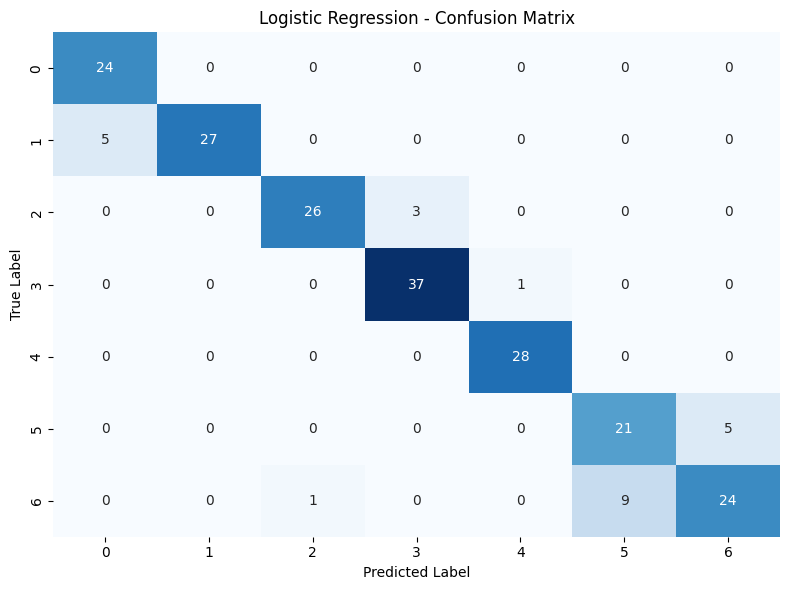

In [110]:
# 🎯 Evaluate on external dataset (data2)
print("\n🔴 Logistic Regression Evaluation on External Test Set (data2)")
print(f"Accuracy  : {accuracy_score(y2, y2_pred):.4f}")
print(f"Precision : {precision_score(y2, y2_pred, average='weighted'):.4f}")
print(f"Recall    : {recall_score(y2, y2_pred, average='weighted'):.4f}")
print(f"F1 Score  : {f1_score(y2, y2_pred, average='weighted'):.4f}")

# 🧾 Detailed classification report
print("\n📋 Classification Report:\n")
print(classification_report(y2, y2_pred))

# 🔶 Confusion Matrix
cm = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [111]:
# Logistic Regression Regression-style Metrics
print("\n🔴 Logistic Regression - Regression-style Metrics (External Test Set)")
print(f"Mean Squared Error (MSE): {mean_squared_error(y2, y2_pred):.4f}")
print(f"R² Score               : {r2_score(y2, y2_pred):.4f}")



🔴 Logistic Regression - Regression-style Metrics (External Test Set)
Mean Squared Error (MSE): 0.1848
R² Score               : 0.9518



# SVM

In [112]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features and target
selected_features = ['BMI','Weight', 'family_history_with_overweight','CH2O', 'CAEC', 'Age', 'FAF','MTRANS_Motorbike','MTRANS_Automobile','MTRANS_Bike','MTRANS_Public_Transportation','MTRANS_Walking','NCP']
X = dataTrain[selected_features]
y = dataTrain['NObeyesdad']

X2 = dataTest[selected_features]
y2 = dataTest['NObeyesdad']

# Split only the training dataset (data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize based on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale the full external test dataset (data2)
X2_scaled = scaler.transform(X2)

# Train SVM model (linear kernel)
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)

# Evaluate on internal test set (optional)
y_test_pred = svm_model.predict(X_test_scaled)
print("Internal Test Accuracy (from data):", accuracy_score(y_test, y_test_pred))

# Predict and evaluate on external test set (data2)
y2_pred = svm_model.predict(X2_scaled)
print("External Test Accuracy (on data2):", accuracy_score(y2, y2_pred))


Internal Test Accuracy (from data): 0.949468085106383
External Test Accuracy (on data2): 0.95260663507109



🔵 SVM Evaluation on External Test Set (data2)
Accuracy  : 0.9526
Precision : 0.9549
Recall    : 0.9526
F1 Score  : 0.9528

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.91      0.95        32
           2       0.96      0.93      0.95        29
           3       0.93      0.97      0.95        38
           4       1.00      0.96      0.98        28
           5       0.93      0.96      0.94        26
           6       0.97      0.94      0.96        34

    accuracy                           0.95       211
   macro avg       0.95      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211



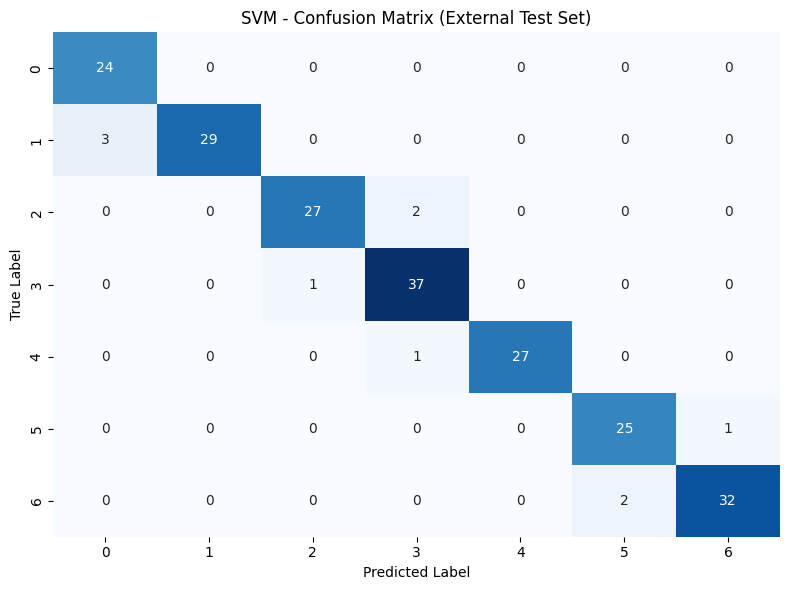

In [113]:
# 🔵 SVM Evaluation on External Test Set
print("\n🔵 SVM Evaluation on External Test Set (data2)")
print(f"Accuracy  : {accuracy_score(y2, y2_pred):.4f}")
print(f"Precision : {precision_score(y2, y2_pred, average='weighted'):.4f}")
print(f"Recall    : {recall_score(y2, y2_pred, average='weighted'):.4f}")
print(f"F1 Score  : {f1_score(y2, y2_pred, average='weighted'):.4f}")

# 📋 Detailed classification report
print("\n📋 Classification Report:\n")
print(classification_report(y2, y2_pred))

# 🔶 Confusion Matrix
cm = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM - Confusion Matrix (External Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# knn

✅ Best k: 1 with cross-validated accuracy: 0.8282


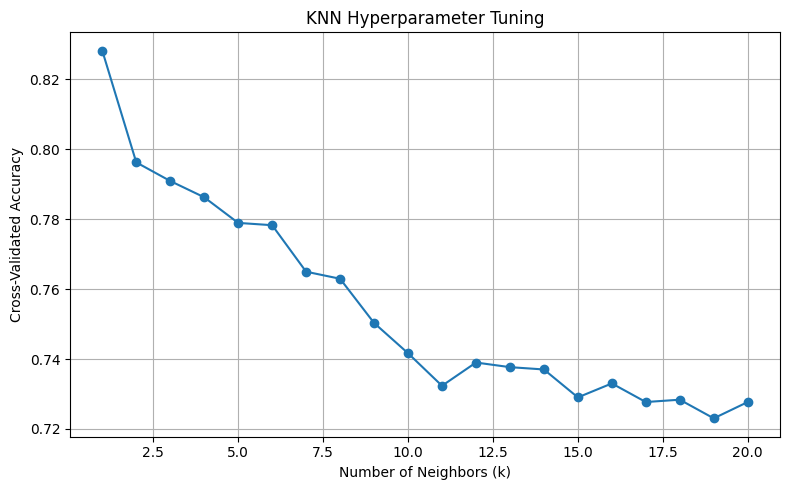

KNN Accuracy on Train: 0.8298
KNN Accuracy on Test: 0.8483


In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 🎯 Feature selection
selected_features = ['BMI','Weight', 'family_history_with_overweight','CH2O', 'CAEC', 'Age', 'FAF','MTRANS_Motorbike','MTRANS_Automobile','MTRANS_Bike','MTRANS_Public_Transportation','MTRANS_Walking','NCP']
X = dataTrain[selected_features]
y = dataTrain['NObeyesdad'].astype(int)

X2 = dataTest[selected_features]
y2 = dataTest['NObeyesdad'].astype(int)

# 🔀 Train-test split (only on dataTrain)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 🔧 Standardization (fit on training data only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X2_scaled = scaler.transform(X2)

# 🔍 Hyperparameter tuning for K (1 to 20)
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_scores.append(score)

best_k = k_values[np.argmax(cv_scores)]
print(f"✅ Best k: {best_k} with cross-validated accuracy: {max(cv_scores):.4f}")

# 📊 Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧠 Train KNN with best k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# 📈 Predictions on data2
y2_pred_train = knn_model.predict(X_test_scaled)
y2_pred_test = knn_model.predict(X2_scaled)

# 🎯 Accuracy evaluation
print(f"KNN Accuracy on Train: {accuracy_score(y_test, y2_pred_train):.4f}")
print(f"KNN Accuracy on Test: {accuracy_score(y2, y2_pred_test):.4f}")



📋 Classification Report on Test:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        24
           1       0.70      0.66      0.68        32
           2       0.84      0.93      0.89        29
           3       1.00      0.95      0.97        38
           4       1.00      1.00      1.00        28
           5       0.74      0.77      0.75        26
           6       0.82      0.68      0.74        34

    accuracy                           0.85       211
   macro avg       0.84      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211



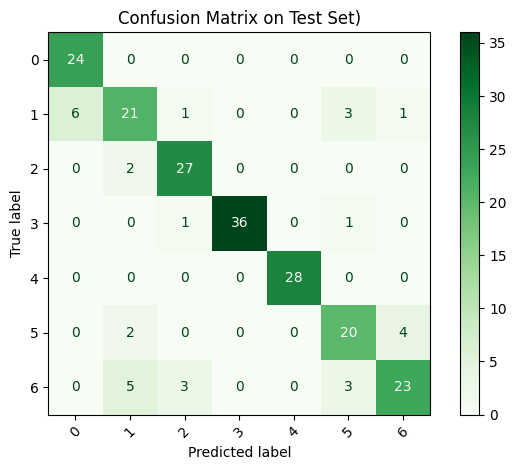

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 📊 Classification report for internal test set
print("\n📋 Classification Report on Test:")
print(classification_report(y2, y2_pred_test))


# 📊 Confusion Matrix for external test set (optional)
cm2 = confusion_matrix(y2, y2_pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap=plt.cm.Greens, xticks_rotation=45)
plt.title("Confusion Matrix on Test Set)")
plt.tight_layout()
plt.show()


# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Select features and target
selected_features = ['BMI','Weight', 'family_history_with_overweight','CH2O', 'CAEC', 'Age', 'FAF',
                     'MTRANS_Motorbike','MTRANS_Bike','MTRANS_Automobile','MTRANS_Public_Transportation','MTRANS_Walking','NCP']
X = dataTrain[selected_features]
y = dataTrain['NObeyesdad']

X2 = dataTest[selected_features]
y2 = dataTest['NObeyesdad']

# Split training data (only data is split, data2 is used for final test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X2_scaled = scaler.transform(X2)

# # Define parameter distribution for RandomizedSearchCV
# param_dist = {
#     'n_estimators': randint(100, 300),
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 5),
#     'max_features': ['sqrt', 'log2']
# }

# # Perform randomized search
# rf = RandomForestClassifier(random_state=42)
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     random_state=42
# )

# random_search.fit(X_train_scaled, y_train)

# # Get best model
# best_rf = random_search.best_estimator_
# print("Best Hyperparameters:", random_search.best_params_)

# # Evaluate on internal test set
# y_test_pred = best_rf.predict(X_test_scaled)
# print(" Test Accuracy (from data):", accuracy_score(y_test, y_test_pred))

# # Evaluate on external test set (data2)
# y_pred_rf = best_rf.predict(X2_scaled)
# print(" Test Accuracy (on data2):", accuracy_score(y2, y_pred_rf))

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on internal test set (optional)
y_test_pred = rf_model.predict(X_test_scaled)
print(" Test Accuracy (from data):", accuracy_score(y_test, y_test_pred))

# Predict on external test set (data2)
y_pred_rf = rf_model.predict(X2_scaled)
print(" Test Accuracy (on data2):", accuracy_score(y2, y_pred_rf))


 Test Accuracy (from data): 0.9840425531914894
 Test Accuracy (on data2): 0.976303317535545


Mean CV Accuracy: 0.9880132890365448
🟢 Random Forest Metrics
Accuracy: 0.976303317535545
Precision: 0.9772963213721507
Recall: 0.976303317535545
F1 Score: 0.9762712322114685

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        32
           2       0.93      0.97      0.95        29
           3       0.97      0.97      0.97        38
           4       1.00      1.00      1.00        28
           5       0.93      1.00      0.96        26
           6       1.00      0.91      0.95        34

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211



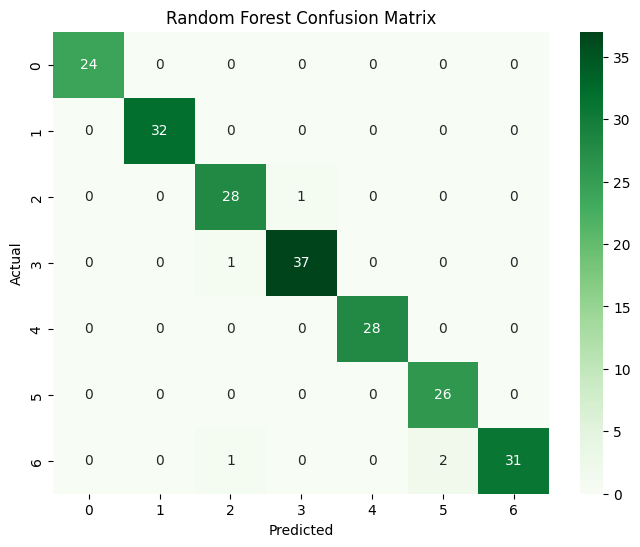

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("Mean CV Accuracy:", scores.mean())

# Random Forest Evaluation
print("🟢 Random Forest Metrics")
print("Accuracy:", accuracy_score(y2, y_pred_rf))
print("Precision:", precision_score(y2, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y2, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y2, y_pred_rf, average='weighted'))

# Classification Report
print("\nClassification Report:\n", classification_report(y2, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y2, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target (already done)
selected_features = ['BMI','Weight', 'family_history_with_overweight','CH2O', 'CAEC', 'Age', 'FAF','MTRANS_Motorbike','MTRANS_Bike','MTRANS_Public_Transportation','MTRANS_Automobile','MTRANS_Walking','NCP']
X = dataTrain[selected_features]
y = dataTrain['NObeyesdad']
X2 = dataTest[selected_features]
y2 = dataTest['NObeyesdad']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_dt_test = dt.predict(X2)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_dt)
accuracy_test = accuracy_score(y2, y_pred_dt_test)

print(f"Model Accuracy Train: {accuracy * 100:.2f}%")
print(f"Model Accuracy Test: {accuracy_test * 100:.2f}%")
print("Classification Report :")
print(classification_report(y2, y_pred_dt_test))


Model Accuracy Train: 96.28%
Model Accuracy Test: 96.21%
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.94      0.97        32
           2       0.96      0.90      0.93        29
           3       0.93      1.00      0.96        38
           4       1.00      1.00      1.00        28
           5       0.93      1.00      0.96        26
           6       1.00      0.91      0.95        34

    accuracy                           0.96       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.96      0.96      0.96       211



# Lightgbm

In [119]:
from lightgbm import LGBMClassifier
# Select features and target
selected_features = ['BMI','family_history_with_overweight', 'CAEC', 'Age', 'MTRANS_Motorbike','MTRANS_Bike','MTRANS_Automobile','MTRANS_Public_Transportation','MTRANS_Walking']
X = dataTrain[selected_features]
y = dataTrain['NObeyesdad']

X2 = dataTest[selected_features]
y2 = dataTest['NObeyesdad']

# Split training data (only data is split, data2 is used for final test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameters Tunning
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 30),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 100),
    'min_child_samples': randint(10, 50),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

lgb = LGBMClassifier(random_state=42, verbose=-1)
search = RandomizedSearchCV(
    lgb, param_distributions=param_dist, n_iter=50, cv=5,
    scoring='accuracy', random_state=42, n_jobs=-1
)
search.fit(X_train, y_train)
lgb = search.best_estimator_

# lgb = LGBMClassifier(verbose=-1)
# lgb.fit(X_train,y_train)
y_pred_lgb = lgb.predict(X_test)
y_pred_lgb_test = lgb.predict(X2)


In [120]:
accuracy = accuracy_score(y_test,y_pred_lgb)
accuracyTest = accuracy_score(y2,y_pred_lgb_test)
print(f"Model Accuracy Train: {accuracy * 100:.2f}%")
print(f"Model Accuracy Test: {accuracyTest * 100:.2f}%")
print("Classification Report:")
print(classification_report(y2, y_pred_lgb_test))

Model Accuracy Train: 95.21%
Model Accuracy Test: 93.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.91      0.95        32
           2       0.93      0.90      0.91        29
           3       0.88      0.97      0.93        38
           4       0.96      0.93      0.95        28
           5       0.93      0.96      0.94        26
           6       0.97      0.91      0.94        34

    accuracy                           0.94       211
   macro avg       0.94      0.94      0.94       211
weighted avg       0.94      0.94      0.94       211



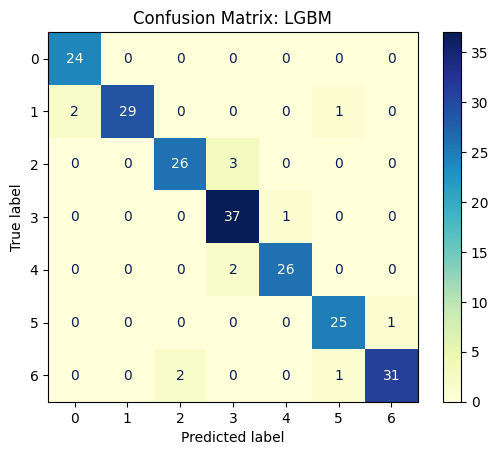

In [121]:
cm_lgb = confusion_matrix(y2,y_pred_lgb_test)

disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb,display_labels=lgb.classes_)
disp_lgb.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: LGBM")
plt.show()

# Naive Bayes Model

Accuracy Train: 0.73
Accuracy Test: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       0.86      0.94      0.90        32
           2       1.00      0.45      0.62        29
           3       0.94      0.42      0.58        38
           4       0.42      1.00      0.60        28
           5       1.00      1.00      1.00        26
           6       1.00      0.82      0.90        34

    accuracy                           0.78       211
   macro avg       0.88      0.80      0.79       211
weighted avg       0.88      0.78      0.78       211



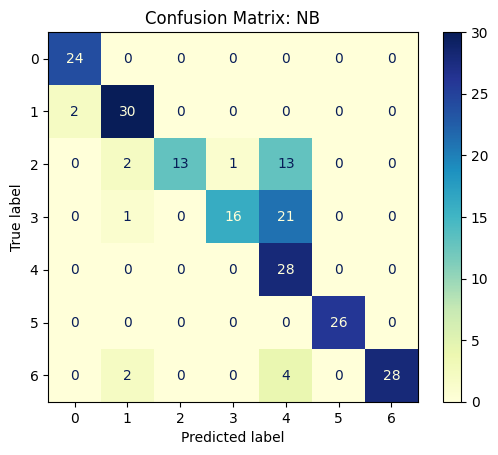

In [122]:
selected_features = ["BMI","family_history_with_overweight", "Age", "FAF",'CH2O','NCP','CAEC']
# Split data
X_train = dataTrain[selected_features]
y_train = dataTrain["NObeyesdad"]

X_test = dataTest[selected_features]
y_test = dataTest["NObeyesdad"]

# ------------------------------
# 4. Naive Bayes Model (Numerical Only)
# ------------------------------

class NaiveBayes:
    def fit(self, X, y):
        """
        Train the Naive Bayes model.
        X: pandas DataFrame of features
        y: pandas Series of labels
        """
        self.classes = np.unique(y)  # Get unique class labels
        self.class_priors = {}       # P(Class)
        self.class_stats = {}        # Mean and variance for each feature per class

        for c in self.classes:
            # Select rows where the class label is 'c'
            X_c = X[y == c]

            # Store prior probability of this class
            self.class_priors[c] = len(X_c) / len(X)

            # For each feature, store mean and variance
            self.class_stats[c] = {}
            for column in X.columns:
                mean = X_c[column].mean()
                var = X_c[column].var()
                self.class_stats[c][column] = (mean, var)

    def gaussian_probability(self, x, mean, var):
        """
        Calculate Gaussian probability density function.
        """
        eps = 1e-6  # small number to avoid division by zero
        coefficient = 1.0 / np.sqrt(2 * np.pi * var + eps)
        exponent = np.exp(- ((x - mean) ** 2) / (2 * var + eps))
        return coefficient * exponent

    def predict(self, X):
        """
        Predict class labels for input X.
        """
        predictions = []

        for index, row in X.iterrows():
            class_probs = {}

            for c in self.classes:
                # Start with log of the prior probability
                log_prob = np.log(self.class_priors[c])

                for column in X.columns:
                    mean, var = self.class_stats[c][column]
                    prob = self.gaussian_probability(row[column], mean, var)
                    log_prob += np.log(prob)

                class_probs[c] = log_prob

            # Choose class with highest log-probability
            predicted_class = max(class_probs, key=class_probs.get)
            predictions.append(predicted_class)

        return np.array(predictions)


# ------------------------------
# 5. Train & Evaluate
# ------------------------------
# Initialize and train model
model = NaiveBayes()
model.fit(X_train, y_train)

# Predict on test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Metrics
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Accuracy Test: {accuracy_score(y2, y_pred_test):.2f}")
print("\nClassification Report:")
print(classification_report(y2, y_pred_test))

cm_nb = confusion_matrix(y_test,y_pred_test)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels=model.classes)
disp_nb.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: NB")
plt.show()